<a href="https://colab.research.google.com/github/BetoxAlka/AnaliticaDatos_Equipo3/blob/main/Actividad3-7/Act3_7_Geneva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción de Características AirBnB GENEVA
## Generación del Frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar un archivo
from google.colab import files
files.upload()

Saving geneva_listing_clean.csv to geneva_listing_clean.csv


{'geneva_listing_clean.csv': b',host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,last_scraped,source,name,description,host_name,host_since,host_location,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_c

In [ ]:
#Ajustar el maximo de columnas
pd.options.display.max_columns = None

#Ajustar el maximo de filas
pd.options.display.max_rows = None

In [305]:
#Crear DataFrame
data = pd.read_csv('geneva_listing_clean.csv',encoding='utf-8')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.shape
data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_id                                       2685 non-null   int64  
 1   host_response_rate                            2685 non-null   float64
 2   host_acceptance_rate                          2685 non-null   float64
 3   host_listings_count                           2685 non-null   float64
 4   host_total_listings_count                     2685 non-null   float64
 5   latitude                                      2685 non-null   float64
 6   longitude                                     2685 non-null   float64
 7   accommodates                                  2685 non-null   float64
 8   bathrooms                                     2685 non-null   float64
 9   bedrooms                                      2685 non-null   f

host_id  host_response_rate  host_acceptance_rate  host_listings_count  \
0    185647               100.0                  80.0                  1.0   
1   1001280               100.0                 100.0                  6.0   
2   1442438               100.0                 100.0                  2.0   
3   1001280               100.0                 100.0                  6.0   
4   1994454                90.0                  71.0                  2.0   
5   2086993               100.0                  98.0                  2.0   
6   3110118               100.0                  69.0                  2.0   
7   3111534                98.7                 100.0                  2.2   
8   3111534                98.7                 100.0                  2.2   
9   2375758               100.0                  96.0                  1.0   
10  3359333               100.0                 100.0                  4.0   
11  3550575                98.7                  82.6                  1.0   
12  3359333               100.0                 100.0                  4.0   
13  3629403               100.0                 100.0                  1.0   
14  3778243               100.0                  96.0                  4.0   
15  3566383               100.0                  82.6                  5.0   
16   777025               100.0                  63.0                  2.0   
17   777025               100.0                  63.0                  2.0   
18  4034142                98.7                  82.6                  1.0   
19  3987132               100.0                  97.0                  1.0   

    host_total_listings_count   latitude  longitude  accommodates  bathrooms  \
0                         1.0  46.201980   6.156720           1.0        1.0   
1                        12.0  46.199640   6.155800           2.0        1.0   
2                         2.0  46.200000   6.168330           3.0        1.0   
3                        12.0  46.207080   6.155450           2.0        1.0   
4                         3.0  46.189040   6.139080           2.0        1.0   
5                         2.0  46.199500   6.173080           2.0        1.0   
6                         6.0  46.211400   6.151070           1.0        1.0   
7                         3.0  46.198750   6.148610           2.0        1.0   
8                         3.0  46.198710   6.149120           2.0        1.0   
9                         2.0  46.201750   6.148520           2.0        1.0   
10                        4.0  46.205420   6.128020           2.0        1.0   
11                        3.0  46.217160   6.139780           1.0        1.0   
12                        4.0  46.206700   6.129490           2.0        1.0   
13                        1.0  46.211998   6.150082           4.0        1.0   
14                       12.0  46.214040   6.124310           4.0        1.0   
15                        7.0  46.197880   6.136910           4.0        1.0   
16                        5.0  46.202340   6.162100           4.0        1.0   
17                        5.0  46.202820   6.161970           2.0        1.0   
18                        4.0  46.205130   6.161570           4.0        1.0   
19                        1.0  46.201460   6.131480           4.0        1.0   

    bedrooms  ...  neighbourhood_cleansed                property_type  \
0        1.0  ...       Commune de Genève  Private room in rental unit   
1        1.0  ...       Commune de Genève           Entire rental unit   
2        1.0  ...                 Versoix           Entire rental unit   
3        1.0  ...       Commune de Genève           Entire rental unit   
4        1.0  ...       Commune de Genève  Private room in rental unit   
5        1.0  ...       Commune de Genève  Private room in rental unit   
6        1.0  ...       Commune de Genève           Entire rental unit   
7        1.0  ...       Commune de Genève           Entire rental unit   
8        1.0  ... 

In [306]:
#Se corrobora que no haya valores nulos
valores_nulos = data.isnull().sum()
valores_nulos

host_id                                         0
host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_location                          0
review_scores_value                             0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
host_name                                       0
host_since                                      0
host_location                                   0
host_response_time                              0
host_is_superhost                               0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
property_type                                   0
room_type                                       0
bathrooms_text                                  0
amenities                                       0
has_availability                                0
calendar_last_scraped                           0
first_review                                    0
last_review                                     0
instant_bookable                                0
dtype: int64

## Regresión Lineal Simple

Para analizar la Regresión Lineal Simple de la base de datos, se llevara a cabo un análisis de la correlación que existe en cuatro tipos de habitación ('room_type') respecto a las siguientes variables:

“host_acceptance_rate vs host_response_rate”

“review_scores_location vs review_scores_cleanliness”

“host_acceptance_rate vs price”

“availability_365 vs number_of_reviews”

“host_acceptance_rate vs number_of_reviews ”

“reviews_per_month vs review_scores_communication”

Cada una se lee de la forma 'dependiente vs independiente' para la realización del modelo.

A partir de los resultados obtenidos, estos se almacenaran en una tabla y se creara el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento elegido, utilizando la variable con mayor correlación.

In [307]:
#Libreria para definir model como la función de regresión lineal
from sklearn.linear_model import LinearRegression

### Entire home/apt

In [308]:
#Se genera el SubFrame con los datos donde el tipo de habitacion sea el establecido
data_entire = data[data['room_type'] == 'Entire home/apt']
data_entire.shape

(1901, 60)

#### Variables 1

In [309]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A1 = data_entire[['host_response_rate']]
var_dep_A1 = data_entire['host_acceptance_rate']

In [8]:
model_A1 = LinearRegression()

In [310]:
#Ajustamos el modelo con las variables antes declaradas
model_A1.fit(X=vars_indep_A1, y=var_dep_A1)

LinearRegression()

In [10]:
#Predecimos los valores a partir de la variable
y_pred_A1 = model_A1.predict(X=data_entire[['host_response_rate']])

In [311]:
#Insertamos la columna de predicciones en el DataFrame
data_entire.insert(0,'predicciones_1',y_pred_A1)
data_entire.head(3)

predicciones_1  host_id  host_response_rate  host_acceptance_rate  \
1       84.831281  1001280               100.0                 100.0   
2       84.831281  1442438               100.0                 100.0   
3       84.831281  1001280               100.0                 100.0   

   host_listings_count  host_total_listings_count  latitude  longitude  \
1                  6.0                       12.0  46.19964    6.15580   
2                  2.0                        2.0  46.20000    6.16833   
3                  6.0                       12.0  46.20708    6.15545   

   accommodates  bathrooms  ...  neighbourhood_cleansed       property_type  \
1           2.0        1.0  ...       Commune de Genève  Entire rental unit   
2           3.0        1.0  ...                 Versoix  Entire rental unit   
3           2.0        1.0  ...       Commune de Genève  Entire rental unit   

         room_type  bathrooms_text  \
1  Entire home/apt          1 bath   
2  Entire home/apt          1 bath   
3  Entire home/apt       1.5 baths   

                                           amenities  has_availability  \
1  ["TV with standard cable", "Hangers", "Microwa...                 t   
2  ["Free dryer \u2013 In building", "Hangers", "...                 t   
3  ["40 inch HDTV with standard cable", "Dedicate...                 t   

   calendar_last_scraped  first_review  last_review  instant_bookable  
1             2024-06-29    2012-11-11   2024-05-31                 t  
2             2024-06-29    2012-03-15   2024-05-26                 f  
3             2024-06-29    2012-03-02   2024-04-16                 t  

[3 rows x 61 columns]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

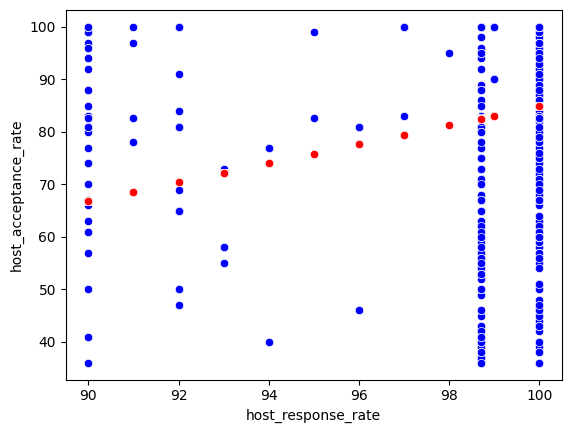

In [12]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=data_entire)
sns.scatterplot(x='host_response_rate', y='predicciones_1', color='red', data=data_entire)

In [18]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A1 = model_A1.score(X=vars_indep_A1, y=var_dep_A1)
coef_deter_A1

0.0695191854236119

In [19]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A1 = np.sqrt(coef_deter_A1)
coef_correl_A1

0.26366491124837205

#### Variables 2

In [20]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A2 = data_entire[['review_scores_cleanliness']]
var_dep_A2 = data_entire['review_scores_location']

In [21]:
model_A2 = LinearRegression()

In [22]:
#Ajustamos el modelo con las variables antes declaradas
model_A2.fit(X=vars_indep_A2, y=var_dep_A2)

LinearRegression()

In [23]:
#Predecimos los valores a partir de la variable
y_pred_A2 = model_A2.predict(X=data_entire[['review_scores_cleanliness']])

In [24]:
#Insertamos la columna de predicciones en el DataFrame
data_entire.insert(1,'predicciones_2',y_pred_A2)
data_entire.head(3)

predicciones_1  predicciones_2  host_id  host_response_rate  \
1       84.831281        4.908530  1001280               100.0   
2       84.831281        4.876879  1442438               100.0   
3       84.831281        4.883209  1001280               100.0   

   host_acceptance_rate  host_listings_count  host_total_listings_count  \
1                 100.0                  6.0                       12.0   
2                 100.0                  2.0                        2.0   
3                 100.0                  6.0                       12.0   

   latitude  longitude  accommodates  ...  neighbourhood_cleansed  \
1  46.19964    6.15580           2.0  ...       Commune de Genève   
2  46.20000    6.16833           3.0  ...                 Versoix   
3  46.20708    6.15545           2.0  ...       Commune de Genève   

        property_type        room_type  bathrooms_text  \
1  Entire rental unit  Entire home/apt          1 bath   
2  Entire rental unit  Entire home/apt          1 bath   
3  Entire rental unit  Entire home/apt       1.5 baths   

                                           amenities  has_availability  \
1  ["TV with standard cable", "Hangers", "Microwa...                 t   
2  ["Free dryer \u2013 In building", "Hangers", "...                 t   
3  ["40 inch HDTV with standard cable", "Dedicate...                 t   

   calendar_last_scraped  first_review  last_review  instant_bookable  
1             2024-06-29    2012-11-11   2024-05-31                 t  
2             2024-06-29    2012-03-15   2024-05-26                 f  
3             2024-06-29    2012-03-02   2024-04-16                 t  

[3 rows x 62 columns]

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

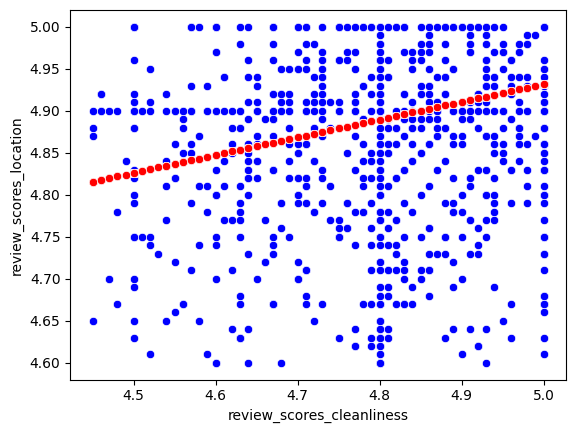

In [25]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=data_entire)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_2', color='red', data=data_entire)

In [26]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A2 = model_A2.score(X=vars_indep_A2, y=var_dep_A2)
coef_deter_A2

0.08277823839042198

In [27]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A2 = np.sqrt(coef_deter_A2)
coef_correl_A2

0.28771207550330935

#### Variables 3

In [28]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A3 = data_entire[['price']]
var_dep_A3 = data_entire['host_acceptance_rate']

In [29]:
model_A3 = LinearRegression()

In [30]:
#Ajustamos el modelo con las variables antes declaradas
model_A3.fit(X=vars_indep_A3, y=var_dep_A3)

LinearRegression()

In [31]:
#Predecimos los valores a partir de la variable
y_pred_A3 = model_A3.predict(X=data_entire[['price']])

In [32]:
#Insertamos la columna de predicciones en el DataFrame
data_entire.insert(2,'predicciones_3',y_pred_A3)
data_entire.head(3)

predicciones_1  predicciones_2  predicciones_3  host_id  \
1       84.831281        4.908530       82.762373  1001280   
2       84.831281        4.876879       81.219985  1442438   
3       84.831281        4.883209       82.004215  1001280   

   host_response_rate  host_acceptance_rate  host_listings_count  \
1               100.0                 100.0                  6.0   
2               100.0                 100.0                  2.0   
3               100.0                 100.0                  6.0   

   host_total_listings_count  latitude  longitude  ...  \
1                       12.0  46.19964    6.15580  ...   
2                        2.0  46.20000    6.16833  ...   
3                       12.0  46.20708    6.15545  ...   

   neighbourhood_cleansed       property_type        room_type  \
1       Commune de Genève  Entire rental unit  Entire home/apt   
2                 Versoix  Entire rental unit  Entire home/apt   
3       Commune de Genève  Entire rental unit  Entire home/apt   

   bathrooms_text                                          amenities  \
1          1 bath  ["TV with standard cable", "Hangers", "Microwa...   
2          1 bath  ["Free dryer \u2013 In building", "Hangers", "...   
3       1.5 baths  ["40 inch HDTV with standard cable", "Dedicate...   

   has_availability  calendar_last_scraped  first_review  last_review  \
1                 t             2024-06-29    2012-11-11   2024-05-31   
2                 t             2024-06-29    2012-03-15   2024-05-26   
3                 t             2024-06-29    2012-03-02   2024-04-16   

   instant_bookable  
1                 t  
2                 f  
3                 t  

[3 rows x 63 columns]

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

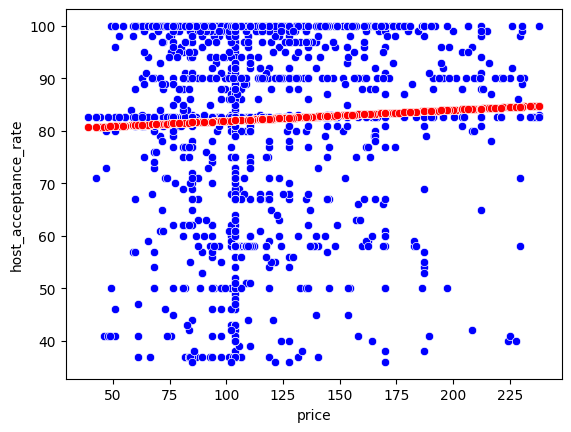

In [33]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=data_entire)
sns.scatterplot(x='price', y='predicciones_3', color='red', data=data_entire)

In [34]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A3 = model_A3.score(X=vars_indep_A3, y=var_dep_A3)
coef_deter_A3

0.0017938080590620409

In [35]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A3 = np.sqrt(coef_deter_A3)
coef_correl_A3

0.04235337128331157

#### Variables 4

In [36]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A4 = data_entire[['number_of_reviews']]
var_dep_A4 = data_entire['availability_365']

In [37]:
model_A4 = LinearRegression()

In [38]:
#Ajustamos el modelo con las variables antes declaradas
model_A4.fit(X=vars_indep_A4, y=var_dep_A4)

LinearRegression()

In [39]:
#Predecimos los valores a partir de la variable
y_pred_A4 = model_A4.predict(X=data_entire[['number_of_reviews']])

In [40]:
#Insertamos la columna de predicciones en el DataFrame
data_entire.insert(3,'predicciones_4',y_pred_A4)
data_entire.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  host_id  \
1       84.831281        4.908530       82.762373      135.766251  1001280   
2       84.831281        4.876879       81.219985      135.766251  1442438   
3       84.831281        4.883209       82.004215      135.766251  1001280   

   host_response_rate  host_acceptance_rate  host_listings_count  \
1               100.0                 100.0                  6.0   
2               100.0                 100.0                  2.0   
3               100.0                 100.0                  6.0   

   host_total_listings_count  latitude  ...  neighbourhood_cleansed  \
1                       12.0  46.19964  ...       Commune de Genève   
2                        2.0  46.20000  ...                 Versoix   
3                       12.0  46.20708  ...       Commune de Genève   

        property_type        room_type  bathrooms_text  \
1  Entire rental unit  Entire home/apt          1 bath   
2  Entire rental unit  Entire home/apt          1 bath   
3  Entire rental unit  Entire home/apt       1.5 baths   

                                           amenities  has_availability  \
1  ["TV with standard cable", "Hangers", "Microwa...                 t   
2  ["Free dryer \u2013 In building", "Hangers", "...                 t   
3  ["40 inch HDTV with standard cable", "Dedicate...                 t   

   calendar_last_scraped  first_review  last_review  instant_bookable  
1             2024-06-29    2012-11-11   2024-05-31                 t  
2             2024-06-29    2012-03-15   2024-05-26                 f  
3             2024-06-29    2012-03-02   2024-04-16                 t  

[3 rows x 64 columns]

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

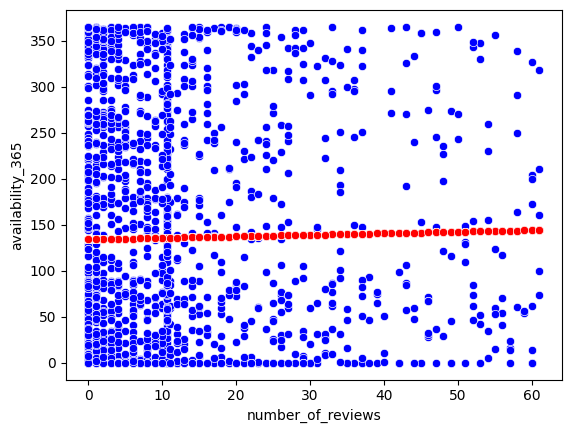

In [41]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='availability_365', color='blue', data=data_entire)
sns.scatterplot(x='number_of_reviews', y='predicciones_4', color='red', data=data_entire)

In [42]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A4 = model_A4.score(X=vars_indep_A4, y=var_dep_A4)
coef_deter_A4

0.0002902585715608419

In [43]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A4 = np.sqrt(coef_deter_A4)
coef_correl_A4

0.017036976596827322

#### Variables 5

In [44]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A5 = data_entire[['number_of_reviews']]
var_dep_A5 = data_entire['host_acceptance_rate']

In [45]:
model_A5 = LinearRegression()

In [46]:
#Ajustamos el modelo con las variables antes declaradas
model_A5.fit(X=vars_indep_A5, y=var_dep_A5)

LinearRegression()

In [47]:
#Predecimos los valores a partir de la variable
y_pred_A5 = model_A5.predict(X=data_entire[['number_of_reviews']])

In [48]:
#Insertamos la columna de predicciones en el DataFrame
data_entire.insert(4,'predicciones_5',y_pred_A5)
data_entire.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
1       84.831281        4.908530       82.762373      135.766251   
2       84.831281        4.876879       81.219985      135.766251   
3       84.831281        4.883209       82.004215      135.766251   

   predicciones_5  host_id  host_response_rate  host_acceptance_rate  \
1       82.261117  1001280               100.0                 100.0   
2       82.261117  1442438               100.0                 100.0   
3       82.261117  1001280               100.0                 100.0   

   host_listings_count  host_total_listings_count  ...  \
1                  6.0                       12.0  ...   
2                  2.0                        2.0  ...   
3                  6.0                       12.0  ...   

   neighbourhood_cleansed       property_type        room_type  \
1       Commune de Genève  Entire rental unit  Entire home/apt   
2                 Versoix  Entire rental unit  Entire home/apt   
3       Commune de Genève  Entire rental unit  Entire home/apt   

   bathrooms_text                                          amenities  \
1          1 bath  ["TV with standard cable", "Hangers", "Microwa...   
2          1 bath  ["Free dryer \u2013 In building", "Hangers", "...   
3       1.5 baths  ["40 inch HDTV with standard cable", "Dedicate...   

   has_availability  calendar_last_scraped  first_review  last_review  \
1                 t             2024-06-29    2012-11-11   2024-05-31   
2                 t             2024-06-29    2012-03-15   2024-05-26   
3                 t             2024-06-29    2012-03-02   2024-04-16   

   instant_bookable  
1                 t  
2                 f  
3                 t  

[3 rows x 65 columns]

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

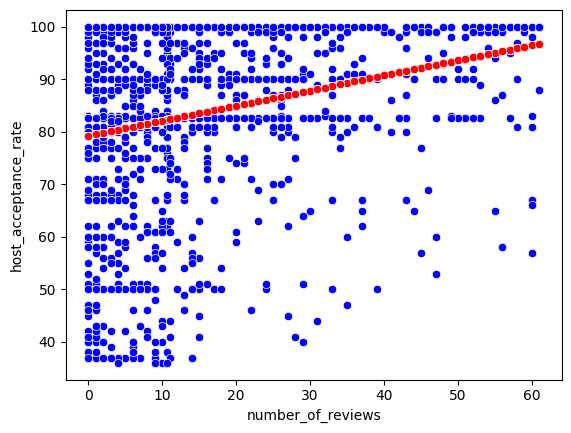

In [49]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='blue', data=data_entire)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color='red', data=data_entire)

In [50]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A5 = model_A5.score(X=vars_indep_A5, y=var_dep_A5)
coef_deter_A5

0.05215028668785493

In [51]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A5 = np.sqrt(coef_deter_A5)
coef_correl_A5

0.22836437263254294

#### Variables 6

In [52]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_A6 = data_entire[['review_scores_communication']]
var_dep_A6 = data_entire['reviews_per_month']

In [53]:
model_A6 = LinearRegression()

In [54]:
#Ajustamos el modelo con las variables antes declaradas
model_A6.fit(X=vars_indep_A6, y=var_dep_A6)

LinearRegression()

In [55]:
#Predecimos los valores a partir de la variable
y_pred_A6 = model_A6.predict(X=data_entire[['review_scores_communication']])

In [56]:
#Insertamos la columna de predicciones en el DataFrame
data_entire.insert(5,'predicciones_6',y_pred_A6)
data_entire.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
1       84.831281        4.908530       82.762373      135.766251   
2       84.831281        4.876879       81.219985      135.766251   
3       84.831281        4.883209       82.004215      135.766251   

   predicciones_5  predicciones_6  host_id  host_response_rate  \
1       82.261117        0.666627  1001280               100.0   
2       82.261117        0.800060  1442438               100.0   
3       82.261117        0.786716  1001280               100.0   

   host_acceptance_rate  host_listings_count  ...  neighbourhood_cleansed  \
1                 100.0                  6.0  ...       Commune de Genève   
2                 100.0                  2.0  ...                 Versoix   
3                 100.0                  6.0  ...       Commune de Genève   

        property_type        room_type  bathrooms_text  \
1  Entire rental unit  Entire home/apt          1 bath   
2  Entire rental unit  Entire home/apt          1 bath   
3  Entire rental unit  Entire home/apt       1.5 baths   

                                           amenities  has_availability  \
1  ["TV with standard cable", "Hangers", "Microwa...                 t   
2  ["Free dryer \u2013 In building", "Hangers", "...                 t   
3  ["40 inch HDTV with standard cable", "Dedicate...                 t   

   calendar_last_scraped  first_review  last_review  instant_bookable  
1             2024-06-29    2012-11-11   2024-05-31                 t  
2             2024-06-29    2012-03-15   2024-05-26                 f  
3             2024-06-29    2012-03-02   2024-04-16                 t  

[3 rows x 66 columns]

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

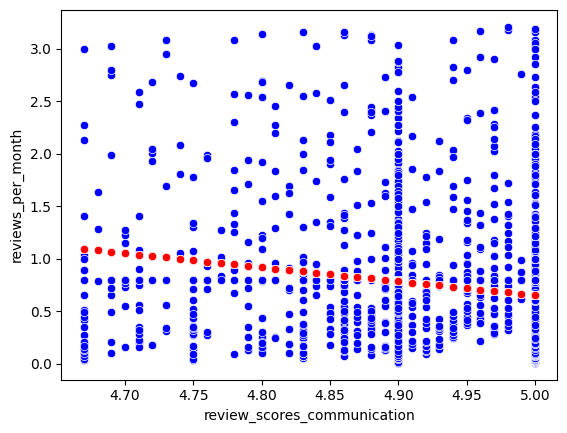

In [57]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color='blue', data=data_entire)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color='red', data=data_entire)

In [58]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_A6 = model_A6.score(X=vars_indep_A6, y=var_dep_A6)
coef_deter_A6

0.027214991724194393

In [59]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_A6 = np.sqrt(coef_deter_A6)
coef_correl_A6

0.16496966910373068

#### Tabla de Coeficientes de Determinación y Correlación

In [60]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_A1,coef_deter_A2,coef_deter_A3,coef_deter_A4,coef_deter_A5,coef_deter_A6],
             'Coef_Correl':[coef_correl_A1,coef_correl_A2,coef_correl_A3,coef_correl_A4,coef_correl_A5,coef_correl_A6]}

#Generar con llaves
df_coef_A = pd.DataFrame(coef_data,index=['Var1','Var2','Var3','Var4','Var5','Var6'])
df_coef_A

Coef_Deter  Coef_Correl
Var1    0.069519     0.263665
Var2    0.082778     0.287712
Var3    0.001794     0.042353
Var4    0.000290     0.017037
Var5    0.052150     0.228364
Var6    0.027215     0.164970

### Private room

In [61]:
#Se genera el SubFrame con los datos donde el tipo de habitacion sea el establecido
data_private = data[data['room_type'] == 'Private room']
data_private.shape

(769, 60)

#### Variables 1

In [62]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B1 = data_private[['host_response_rate']]
var_dep_B1 = data_private['host_acceptance_rate']

In [63]:
model_B1 = LinearRegression()

In [64]:
#Ajustamos el modelo con las variables antes declaradas
model_B1.fit(X=vars_indep_B1, y=var_dep_B1)

LinearRegression()

In [65]:
#Predecimos los valores a partir de la variable
y_pred_B1 = model_B1.predict(X=data_private[['host_response_rate']])

In [66]:
#Insertamos la columna de predicciones en el DataFrame
data_private.insert(0,'predicciones_1',y_pred_B1)
data_private.head(3)

predicciones_1  host_id  host_response_rate  host_acceptance_rate  \
0       84.878989   185647               100.0                  80.0   
4       71.472944  1994454                90.0                  71.0   
5       84.878989  2086993               100.0                  98.0   

   host_listings_count  host_total_listings_count  latitude  longitude  \
0                  1.0                        1.0  46.20198    6.15672   
4                  2.0                        3.0  46.18904    6.13908   
5                  2.0                        2.0  46.19950    6.17308   

   accommodates  bathrooms  ...  neighbourhood_cleansed  \
0           1.0        1.0  ...       Commune de Genève   
4           2.0        1.0  ...       Commune de Genève   
5           2.0        1.0  ...       Commune de Genève   

                 property_type     room_type    bathrooms_text  \
0  Private room in rental unit  Private room  1.5 shared baths   
4  Private room in rental unit  Private room     1 shared bath   
5  Private room in rental unit  Private room         1.5 baths   

                                           amenities  has_availability  \
0  ["TV with standard cable", "Dryer", "Cooking b...                 t   
4  ["Mountain view", "Hangers", "Single level hom...                 t   
5  ["Hangers", "Garden view", "Dedicated workspac...                 t   

   calendar_last_scraped  first_review  last_review  instant_bookable  
0             2024-06-29    2011-09-24   2024-06-14                 f  
4             2024-06-29    2012-07-15   2024-05-16                 f  
5             2024-06-29    2013-05-25   2024-06-17                 t  

[3 rows x 61 columns]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

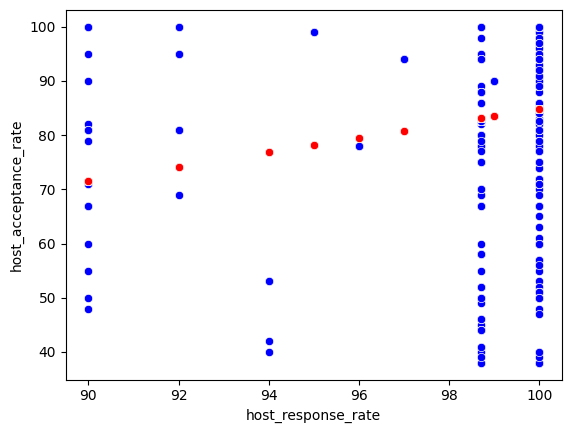

In [67]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=data_private)
sns.scatterplot(x='host_response_rate', y='predicciones_1', color='red', data=data_private)

In [68]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B1 = model_B1.score(X=vars_indep_B1, y=var_dep_B1)
coef_deter_B1

0.021215945526286473

In [69]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B1 = np.sqrt(coef_deter_B1)
coef_correl_B1

0.14565694465519477

#### Variables 2

In [70]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B2 = data_private[['review_scores_cleanliness']]
var_dep_B2 = data_private['review_scores_location']

In [71]:
model_B2 = LinearRegression()

In [72]:
#Ajustamos el modelo con las variables antes declaradas
model_B2.fit(X=vars_indep_B2, y=var_dep_B2)

LinearRegression()

In [73]:
#Predecimos los valores a partir de la variable
y_pred_B2 = model_B2.predict(X=data_private[['review_scores_cleanliness']])

In [74]:
#Insertamos la columna de predicciones en el DataFrame
data_private.insert(1,'predicciones_2',y_pred_B2)
data_private.head(3)

predicciones_1  predicciones_2  host_id  host_response_rate  \
0       84.878989        4.866929   185647               100.0   
4       71.472944        4.886149  1994454                90.0   
5       84.878989        4.913912  2086993               100.0   

   host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                  80.0                  1.0                        1.0   
4                  71.0                  2.0                        3.0   
5                  98.0                  2.0                        2.0   

   latitude  longitude  accommodates  ...  neighbourhood_cleansed  \
0  46.20198    6.15672           1.0  ...       Commune de Genève   
4  46.18904    6.13908           2.0  ...       Commune de Genève   
5  46.19950    6.17308           2.0  ...       Commune de Genève   

                 property_type     room_type    bathrooms_text  \
0  Private room in rental unit  Private room  1.5 shared baths   
4  Private room in rental unit  Private room     1 shared bath   
5  Private room in rental unit  Private room         1.5 baths   

                                           amenities  has_availability  \
0  ["TV with standard cable", "Dryer", "Cooking b...                 t   
4  ["Mountain view", "Hangers", "Single level hom...                 t   
5  ["Hangers", "Garden view", "Dedicated workspac...                 t   

   calendar_last_scraped  first_review  last_review  instant_bookable  
0             2024-06-29    2011-09-24   2024-06-14                 f  
4             2024-06-29    2012-07-15   2024-05-16                 f  
5             2024-06-29    2013-05-25   2024-06-17                 t  

[3 rows x 62 columns]

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

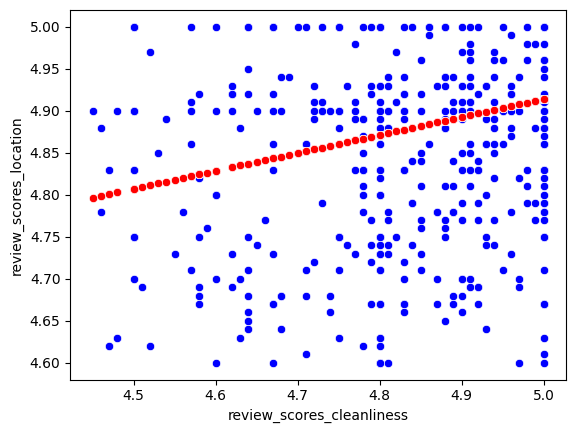

In [75]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=data_private)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_2', color='red', data=data_private)

In [76]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B2 = model_B2.score(X=vars_indep_B2, y=var_dep_B2)
coef_deter_B2

0.07286261358404222

In [77]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B2 = np.sqrt(coef_deter_B2)
coef_correl_B2

0.26993075701750296

#### Variables 3

In [78]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B3 = data_private[['price']]
var_dep_B3 = data_private['host_acceptance_rate']

In [79]:
model_B3 = LinearRegression()

In [80]:
#Ajustamos el modelo con las variables antes declaradas
model_B3.fit(X=vars_indep_B3, y=var_dep_B3)

LinearRegression()

In [81]:
#Predecimos los valores a partir de la variable
y_pred_B3 = model_B3.predict(X=data_private[['price']])

In [82]:
#Insertamos la columna de predicciones en el DataFrame
data_private.insert(2,'predicciones_3',y_pred_B3)
data_private.head(3)

predicciones_1  predicciones_2  predicciones_3  host_id  \
0       84.878989        4.866929       83.620747   185647   
4       71.472944        4.886149       83.016042  1994454   
5       84.878989        4.913912       83.638024  2086993   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0               100.0                  80.0                  1.0   
4                90.0                  71.0                  2.0   
5               100.0                  98.0                  2.0   

   host_total_listings_count  latitude  longitude  ...  \
0                        1.0  46.20198    6.15672  ...   
4                        3.0  46.18904    6.13908  ...   
5                        2.0  46.19950    6.17308  ...   

   neighbourhood_cleansed                property_type     room_type  \
0       Commune de Genève  Private room in rental unit  Private room   
4       Commune de Genève  Private room in rental unit  Private room   
5       Commune de Genève  Private room in rental unit  Private room   

     bathrooms_text                                          amenities  \
0  1.5 shared baths  ["TV with standard cable", "Dryer", "Cooking b...   
4     1 shared bath  ["Mountain view", "Hangers", "Single level hom...   
5         1.5 baths  ["Hangers", "Garden view", "Dedicated workspac...   

   has_availability  calendar_last_scraped  first_review  last_review  \
0                 t             2024-06-29    2011-09-24   2024-06-14   
4                 t             2024-06-29    2012-07-15   2024-05-16   
5                 t             2024-06-29    2013-05-25   2024-06-17   

   instant_bookable  
0                 f  
4                 f  
5                 t  

[3 rows x 63 columns]

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

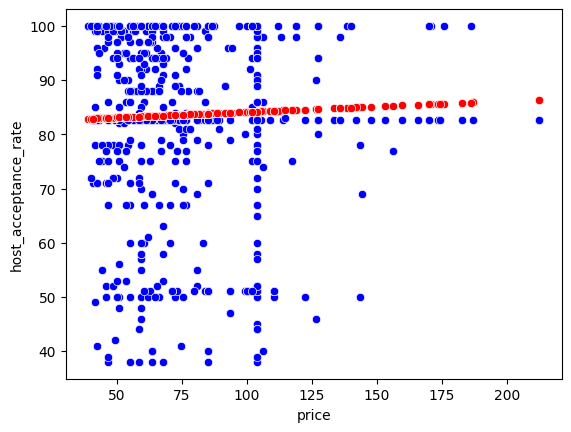

In [83]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=data_private)
sns.scatterplot(x='price', y='predicciones_3', color='red', data=data_private)

In [84]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B3 = model_B3.score(X=vars_indep_B3, y=var_dep_B3)
coef_deter_B3

0.001354266488106215

In [85]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B3 = np.sqrt(coef_deter_B3)
coef_correl_B3

0.036800359890987684

#### Variables 4

In [86]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B4 = data_private[['number_of_reviews']]
var_dep_B4 = data_private['availability_365']

In [87]:
model_B4 = LinearRegression()

In [88]:
#Ajustamos el modelo con las variables antes declaradas
model_B4.fit(X=vars_indep_B4, y=var_dep_B4)

LinearRegression()

In [89]:
#Predecimos los valores a partir de la variable
y_pred_B4 = model_B4.predict(X=data_private[['number_of_reviews']])
y_pred_B4

array([151.81638365, 150.44573545, 151.81638365, 151.81638365,
       151.28622728, 151.81638365, 151.81638365, 151.81638365,
       151.81638365, 152.06206588, 151.81638365, 151.81638365,
       151.81638365, 151.81638365, 151.18924745, 151.81638365,
       151.41553371, 151.64181997, 151.15692084, 151.3832071 ,
       151.81638365, 151.81638365, 150.6396951 , 151.81638365,
       152.09439249, 151.3832071 , 151.57716675, 152.02973927,
       151.81638365, 151.81638365, 151.48018693, 151.81638365,
       152.09439249, 150.73667493, 150.83365476, 150.76900154,
       152.15904571, 151.81638365, 151.99741266, 151.81638365,
       151.67414658, 151.41553371, 151.28622728, 151.81638365,
       150.57504189, 151.81638365, 151.81638365, 150.28410241,
       152.1267191 , 151.99741266, 152.1267191 , 151.81638365,
       151.96508605, 151.60949336, 151.22157406, 151.86810623,
       151.81638365, 151.05994102, 150.76900154, 151.81638365,
       152.09439249, 152.15904571, 151.90043284, 151.38

In [90]:
#Insertamos la columna de predicciones en el DataFrame
data_private.insert(3,'predicciones_4',y_pred_B4)
data_private.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  host_id  \
0       84.878989        4.866929       83.620747      151.816384   185647   
4       71.472944        4.886149       83.016042      150.445735  1994454   
5       84.878989        4.913912       83.638024      151.816384  2086993   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0               100.0                  80.0                  1.0   
4                90.0                  71.0                  2.0   
5               100.0                  98.0                  2.0   

   host_total_listings_count  latitude  ...  neighbourhood_cleansed  \
0                        1.0  46.20198  ...       Commune de Genève   
4                        3.0  46.18904  ...       Commune de Genève   
5                        2.0  46.19950  ...       Commune de Genève   

                 property_type     room_type    bathrooms_text  \
0  Private room in rental unit  Private room  1.5 shared baths   
4  Private room in rental unit  Private room     1 shared bath   
5  Private room in rental unit  Private room         1.5 baths   

                                           amenities  has_availability  \
0  ["TV with standard cable", "Dryer", "Cooking b...                 t   
4  ["Mountain view", "Hangers", "Single level hom...                 t   
5  ["Hangers", "Garden view", "Dedicated workspac...                 t   

   calendar_last_scraped  first_review  last_review  instant_bookable  
0             2024-06-29    2011-09-24   2024-06-14                 f  
4             2024-06-29    2012-07-15   2024-05-16                 f  
5             2024-06-29    2013-05-25   2024-06-17                 t  

[3 rows x 64 columns]

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

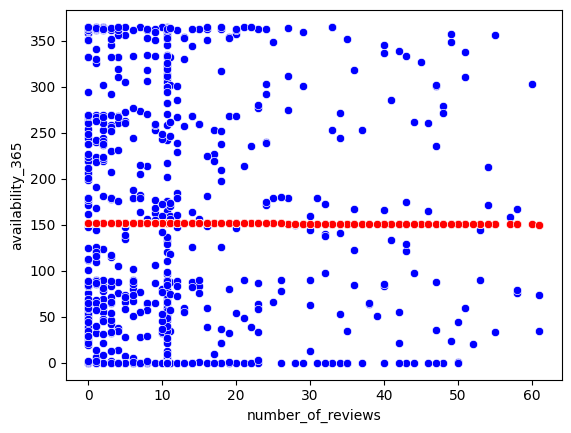

In [91]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='availability_365', color='blue', data=data_private)
sns.scatterplot(x='number_of_reviews', y='predicciones_4', color='red', data=data_private)

In [92]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B4 = model_B4.score(X=vars_indep_B4, y=var_dep_B4)
coef_deter_B4

1.1080887754366664e-05

In [93]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B4 = np.sqrt(coef_deter_B4)
coef_correl_B4

0.0033287967427235122

#### Variables 5

In [94]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B5 = data_private[['number_of_reviews']]
var_dep_B5 = data_private['host_acceptance_rate']

In [95]:
model_B5 = LinearRegression()

In [96]:
#Ajustamos el modelo con las variables antes declaradas
model_B5.fit(X=vars_indep_B5, y=var_dep_B5)

LinearRegression()

In [97]:
#Predecimos los valores a partir de la variable
y_pred_B5 = model_B5.predict(X=data_private[['number_of_reviews']])

In [98]:
#Insertamos la columna de predicciones en el DataFrame
data_private.insert(4,'predicciones_5',y_pred_B5)
data_private.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0       84.878989        4.866929       83.620747      151.816384   
4       71.472944        4.886149       83.016042      150.445735   
5       84.878989        4.913912       83.638024      151.816384   

   predicciones_5  host_id  host_response_rate  host_acceptance_rate  \
0       83.666351   185647               100.0                  80.0   
4       88.146287  1994454                90.0                  71.0   
5       83.666351  2086993               100.0                  98.0   

   host_listings_count  host_total_listings_count  ...  \
0                  1.0                        1.0  ...   
4                  2.0                        3.0  ...   
5                  2.0                        2.0  ...   

   neighbourhood_cleansed                property_type     room_type  \
0       Commune de Genève  Private room in rental unit  Private room   
4       Commune de Genève  Private room in rental unit  Private room   
5       Commune de Genève  Private room in rental unit  Private room   

     bathrooms_text                                          amenities  \
0  1.5 shared baths  ["TV with standard cable", "Dryer", "Cooking b...   
4     1 shared bath  ["Mountain view", "Hangers", "Single level hom...   
5         1.5 baths  ["Hangers", "Garden view", "Dedicated workspac...   

   has_availability  calendar_last_scraped  first_review  last_review  \
0                 t             2024-06-29    2011-09-24   2024-06-14   
4                 t             2024-06-29    2012-07-15   2024-05-16   
5                 t             2024-06-29    2013-05-25   2024-06-17   

   instant_bookable  
0                 f  
4                 f  
5                 t  

[3 rows x 65 columns]

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

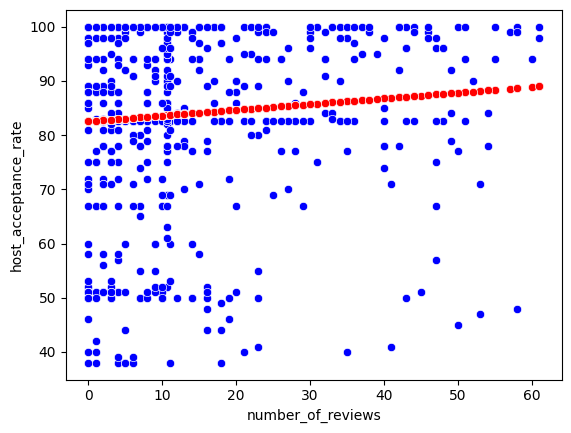

In [99]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='blue', data=data_private)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color='red', data=data_private)

In [100]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B5 = model_B5.score(X=vars_indep_B5, y=var_dep_B5)
coef_deter_B5

0.008122517296665466

In [101]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B5 = np.sqrt(coef_deter_B5)
coef_correl_B5

0.09012500927414913

#### Variables 6

In [102]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_B6 = data_private[['review_scores_communication']]
var_dep_B6 = data_private['reviews_per_month']

In [103]:
model_B6 = LinearRegression()

In [104]:
#Ajustamos el modelo con las variables antes declaradas
model_B6.fit(X=vars_indep_B6, y=var_dep_B6)

LinearRegression()

In [105]:
#Predecimos los valores a partir de la variable
y_pred_B6 = model_B6.predict(X=data_private[['review_scores_communication']])

In [106]:
#Insertamos la columna de predicciones en el DataFrame
data_private.insert(5,'predicciones_6',y_pred_B6)
data_private.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0       84.878989        4.866929       83.620747      151.816384   
4       71.472944        4.886149       83.016042      150.445735   
5       84.878989        4.913912       83.638024      151.816384   

   predicciones_5  predicciones_6  host_id  host_response_rate  \
0       83.666351        0.852893   185647               100.0   
4       88.146287        0.823711  1994454                90.0   
5       83.666351        0.765347  2086993               100.0   

   host_acceptance_rate  host_listings_count  ...  neighbourhood_cleansed  \
0                  80.0                  1.0  ...       Commune de Genève   
4                  71.0                  2.0  ...       Commune de Genève   
5                  98.0                  2.0  ...       Commune de Genève   

                 property_type     room_type    bathrooms_text  \
0  Private room in rental unit  Private room  1.5 shared baths   
4  Private room in rental unit  Private room     1 shared bath   
5  Private room in rental unit  Private room         1.5 baths   

                                           amenities  has_availability  \
0  ["TV with standard cable", "Dryer", "Cooking b...                 t   
4  ["Mountain view", "Hangers", "Single level hom...                 t   
5  ["Hangers", "Garden view", "Dedicated workspac...                 t   

   calendar_last_scraped  first_review  last_review  instant_bookable  
0             2024-06-29    2011-09-24   2024-06-14                 f  
4             2024-06-29    2012-07-15   2024-05-16                 f  
5             2024-06-29    2013-05-25   2024-06-17                 t  

[3 rows x 66 columns]

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

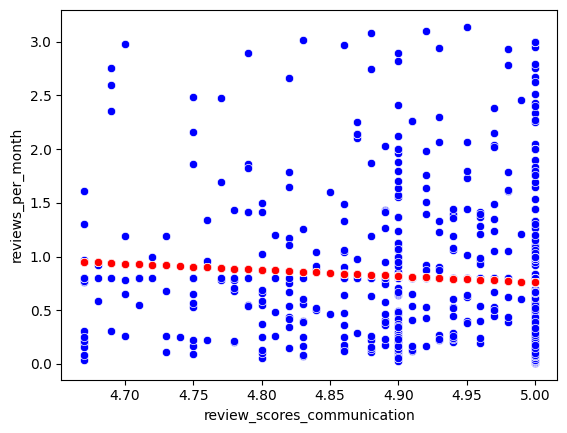

In [107]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color='blue', data=data_private)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color='red', data=data_private)

In [108]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_B6 = model_B6.score(X=vars_indep_B6, y=var_dep_B6)
coef_deter_B6

0.00521127532453447

In [109]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_B6 = np.sqrt(coef_deter_B6)
coef_correl_B6

0.07218916348410245

#### Tabla de Coeficientes de Determinación y Correlación

In [110]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_B1,coef_deter_B2,coef_deter_B3,coef_deter_B4,coef_deter_B5,coef_deter_B6],
             'Coef_Correl':[coef_correl_B1,coef_correl_B2,coef_correl_B3,coef_correl_B4,coef_correl_B5,coef_correl_B6]}

#Generar con llaves
df_coef_B = pd.DataFrame(coef_data,index=['Var1','Var2','Var3','Var4','Var5','Var6'])
df_coef_B

Coef_Deter  Coef_Correl
Var1    0.021216     0.145657
Var2    0.072863     0.269931
Var3    0.001354     0.036800
Var4    0.000011     0.003329
Var5    0.008123     0.090125
Var6    0.005211     0.072189

### Shared room

In [111]:
#Se genera el SubFrame con los datos donde el tipo de habitacion sea el establecido
data_shared = data[data['room_type'] == 'Shared room']
data_shared.shape

(13, 60)

#### Variables 1

In [112]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C1 = data_shared[['host_response_rate']]
var_dep_C1 = data_shared['host_acceptance_rate']

In [113]:
model_C1 = LinearRegression()

In [114]:
#Ajustamos el modelo con las variables antes declaradas
model_C1.fit(X=vars_indep_C1, y=var_dep_C1)

LinearRegression()

In [115]:
#Predecimos los valores a partir de la variable
y_pred_C1 = model_C1.predict(X=data_shared[['host_response_rate']])
y_pred_C1

array([63. , 82.4, 82.4, 63. , 63. , 82.4, 63. , 63. , 82.4, 82.4, 82.4,
       82.4, 82.4])

In [116]:
#Insertamos la columna de predicciones en el DataFrame
data_shared.insert(0,'predicciones_1',y_pred_C1)
data_shared.head(3)

predicciones_1   host_id  host_response_rate  host_acceptance_rate  \
114            63.0  30661130               100.0                  43.0   
135            82.4   8682387                98.7                  82.6   
267            82.4   2288427                98.7                  82.6   

     host_listings_count  host_total_listings_count  latitude  longitude  \
114                  4.0                        4.0  46.19665    6.14729   
135                  1.0                        1.0  46.20000    6.10000   
267                  4.0                        6.0  46.22698    6.10000   

     accommodates  bathrooms  ...  neighbourhood_cleansed  \
114           3.0        1.0  ...       Commune de Genève   
135           1.0        1.0  ...               Confignon   
267           2.0        1.0  ...          Grand-Saconnex   

                  property_type    room_type    bathrooms_text  \
114         Shared room in loft  Shared room  1.5 shared baths   
135  Shared room in rental unit  Shared room     1 shared bath   
267         Shared room in home  Shared room     1 shared bath   

                                             amenities  has_availability  \
114  ["Hangers", "Portable fans", "Hair dryer", "Cl...                 t   
135  ["Breakfast", "Essentials", "Shampoo", "Free p...                 t   
267  ["Dryer", "TV", "Free parking on premises", "W...                 t   

     calendar_last_scraped  first_review  last_review  instant_bookable  
114             2024-06-29    2015-05-09   2024-06-07                 f  
135             2024-06-29    2015-09-08   2024-01-29                 f  
267             2024-06-29    2016-06-30   2016-06-30                 f  

[3 rows x 61 columns]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

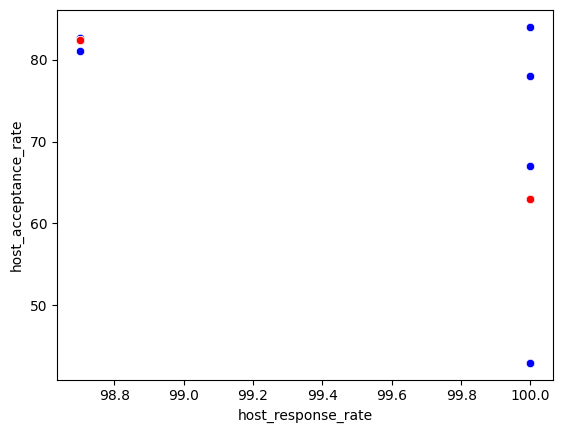

In [117]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=data_shared)
sns.scatterplot(x='host_response_rate', y='predicciones_1', color='red', data=data_shared)

In [118]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C1 = model_C1.score(X=vars_indep_C1, y=var_dep_C1)
coef_deter_C1

0.4382710442533112

In [119]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C1 = np.sqrt(coef_deter_C1)
coef_correl_C1

0.6620204258580782

#### Variables 2

In [120]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C2 = data_shared[['review_scores_cleanliness']]
var_dep_C2 = data_shared['review_scores_location']

In [121]:
model_C2 = LinearRegression()

In [122]:
#Ajustamos el modelo con las variables antes declaradas
model_C2.fit(X=vars_indep_C2, y=var_dep_C2)

LinearRegression()

In [123]:
#Predecimos los valores a partir de la variable
y_pred_C2 = model_C2.predict(X=data_shared[['review_scores_cleanliness']])

In [124]:
#Insertamos la columna de predicciones en el DataFrame
data_shared.insert(1,'predicciones_2',y_pred_C2)
data_shared.head(3)

predicciones_1  predicciones_2   host_id  host_response_rate  \
114            63.0        4.909717  30661130               100.0   
135            82.4        4.884609   8682387                98.7   
267            82.4        4.884609   2288427                98.7   

     host_acceptance_rate  host_listings_count  host_total_listings_count  \
114                  43.0                  4.0                        4.0   
135                  82.6                  1.0                        1.0   
267                  82.6                  4.0                        6.0   

     latitude  longitude  accommodates  ...  neighbourhood_cleansed  \
114  46.19665    6.14729           3.0  ...       Commune de Genève   
135  46.20000    6.10000           1.0  ...               Confignon   
267  46.22698    6.10000           2.0  ...          Grand-Saconnex   

                  property_type    room_type    bathrooms_text  \
114         Shared room in loft  Shared room  1.5 shared baths   
135  Shared room in rental unit  Shared room     1 shared bath   
267         Shared room in home  Shared room     1 shared bath   

                                             amenities  has_availability  \
114  ["Hangers", "Portable fans", "Hair dryer", "Cl...                 t   
135  ["Breakfast", "Essentials", "Shampoo", "Free p...                 t   
267  ["Dryer", "TV", "Free parking on premises", "W...                 t   

     calendar_last_scraped  first_review  last_review  instant_bookable  
114             2024-06-29    2015-05-09   2024-06-07                 f  
135             2024-06-29    2015-09-08   2024-01-29                 f  
267             2024-06-29    2016-06-30   2016-06-30                 f  

[3 rows x 62 columns]

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

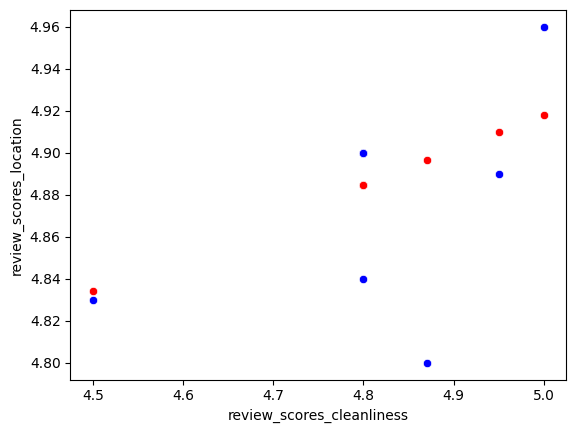

In [125]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=data_shared)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_2', color='red', data=data_shared)

In [126]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C2 = model_C2.score(X=vars_indep_C2, y=var_dep_C2)
coef_deter_C2

0.22220467017819834

In [127]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C2 = np.sqrt(coef_deter_C2)
coef_correl_C2

0.4713859036693804

#### Variables 3

In [128]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C3 = data_shared[['price']]
var_dep_C3 = data_shared['host_acceptance_rate']

In [129]:
model_C3 = LinearRegression()

In [130]:
#Ajustamos el modelo con las variables antes declaradas
model_C3.fit(X=vars_indep_C3, y=var_dep_C3)

LinearRegression()

In [131]:
#Predecimos los valores a partir de la variable
y_pred_C3 = model_C3.predict(X=data_shared[['price']])

In [132]:
#Insertamos la columna de predicciones en el DataFrame
data_shared.insert(2,'predicciones_3',y_pred_C3)
data_shared.head(3)

predicciones_1  predicciones_2  predicciones_3   host_id  \
114            63.0        4.909717       73.588498  30661130   
135            82.4        4.884609       73.588498   8682387   
267            82.4        4.884609       73.588498   2288427   

     host_response_rate  host_acceptance_rate  host_listings_count  \
114               100.0                  43.0                  4.0   
135                98.7                  82.6                  1.0   
267                98.7                  82.6                  4.0   

     host_total_listings_count  latitude  longitude  ...  \
114                        4.0  46.19665    6.14729  ...   
135                        1.0  46.20000    6.10000  ...   
267                        6.0  46.22698    6.10000  ...   

     neighbourhood_cleansed               property_type    room_type  \
114       Commune de Genève         Shared room in loft  Shared room   
135               Confignon  Shared room in rental unit  Shared room   
267          Grand-Saconnex         Shared room in home  Shared room   

       bathrooms_text                                          amenities  \
114  1.5 shared baths  ["Hangers", "Portable fans", "Hair dryer", "Cl...   
135     1 shared bath  ["Breakfast", "Essentials", "Shampoo", "Free p...   
267     1 shared bath  ["Dryer", "TV", "Free parking on premises", "W...   

     has_availability  calendar_last_scraped  first_review  last_review  \
114                 t             2024-06-29    2015-05-09   2024-06-07   
135                 t             2024-06-29    2015-09-08   2024-01-29   
267                 t             2024-06-29    2016-06-30   2016-06-30   

     instant_bookable  
114                 f  
135                 f  
267                 f  

[3 rows x 63 columns]

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

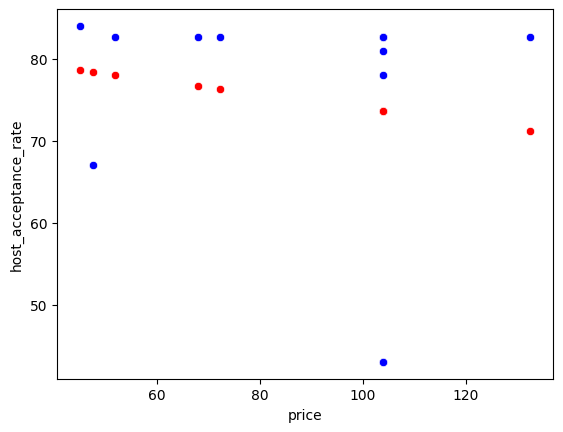

In [133]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=data_shared)
sns.scatterplot(x='price', y='predicciones_3', color='red', data=data_shared)

In [134]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C3 = model_C3.score(X=vars_indep_C3, y=var_dep_C3)
coef_deter_C3

0.025231888649705048

In [135]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C3 = np.sqrt(coef_deter_C3)
coef_correl_C3

0.15884548671493642

#### Variables 4

In [136]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C4 = data_shared[['number_of_reviews']]
var_dep_C4 = data_shared['availability_365']

In [137]:
model_C4 = LinearRegression()

In [138]:
#Ajustamos el modelo con las variables antes declaradas
model_C4.fit(X=vars_indep_C4, y=var_dep_C4)

LinearRegression()

In [139]:
#Predecimos los valores a partir de la variable
y_pred_C4 = model_C4.predict(X=data_shared[['number_of_reviews']])

In [140]:
#Insertamos la columna de predicciones en el DataFrame
data_shared.insert(3,'predicciones_4',y_pred_C4)
data_shared.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4   host_id  \
114            63.0        4.909717       73.588498      167.249997  30661130   
135            82.4        4.884609       73.588498      213.340500   8682387   
267            82.4        4.884609       73.588498      213.340500   2288427   

     host_response_rate  host_acceptance_rate  host_listings_count  \
114               100.0                  43.0                  4.0   
135                98.7                  82.6                  1.0   
267                98.7                  82.6                  4.0   

     host_total_listings_count  latitude  ...  neighbourhood_cleansed  \
114                        4.0  46.19665  ...       Commune de Genève   
135                        1.0  46.20000  ...               Confignon   
267                        6.0  46.22698  ...          Grand-Saconnex   

                  property_type    room_type    bathrooms_text  \
114         Shared room in loft  Shared room  1.5 shared baths   
135  Shared room in rental unit  Shared room     1 shared bath   
267         Shared room in home  Shared room     1 shared bath   

                                             amenities  has_availability  \
114  ["Hangers", "Portable fans", "Hair dryer", "Cl...                 t   
135  ["Breakfast", "Essentials", "Shampoo", "Free p...                 t   
267  ["Dryer", "TV", "Free parking on premises", "W...                 t   

     calendar_last_scraped  first_review  last_review  instant_bookable  
114             2024-06-29    2015-05-09   2024-06-07                 f  
135             2024-06-29    2015-09-08   2024-01-29                 f  
267             2024-06-29    2016-06-30   2016-06-30                 f  

[3 rows x 64 columns]

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

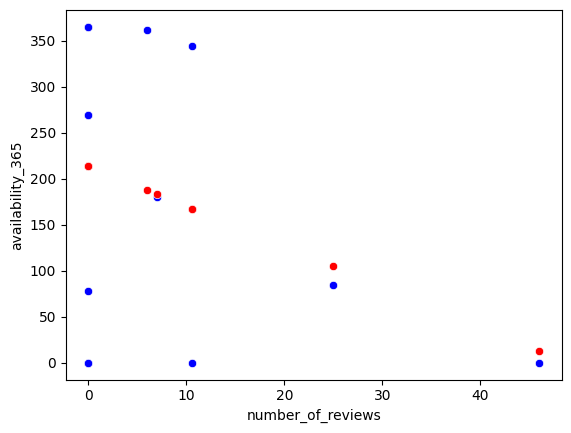

In [141]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='availability_365', color='blue', data=data_shared)
sns.scatterplot(x='number_of_reviews', y='predicciones_4', color='red', data=data_shared)

In [142]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C4 = model_C4.score(X=vars_indep_C4, y=var_dep_C4)
coef_deter_C4

0.14168612011941617

In [143]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C4 = np.sqrt(coef_deter_C4)
coef_correl_C4

0.3764121678684367

#### Variables 5

In [144]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C5 = data_shared[['number_of_reviews']]
var_dep_C5 = data_shared['host_acceptance_rate']

In [145]:
model_C5 = LinearRegression()

In [146]:
#Ajustamos el modelo con las variables antes declaradas
model_C5.fit(X=vars_indep_C5, y=var_dep_C5)

LinearRegression()

In [147]:
#Predecimos los valores a partir de la variable
y_pred_C5 = model_C5.predict(X=data_shared[['number_of_reviews']])

In [148]:
#Insertamos la columna de predicciones en el DataFrame
data_shared.insert(4,'predicciones_5',y_pred_C5)
data_shared.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
114            63.0        4.909717       73.588498      167.249997   
135            82.4        4.884609       73.588498      213.340500   
267            82.4        4.884609       73.588498      213.340500   

     predicciones_5   host_id  host_response_rate  host_acceptance_rate  \
114       73.179497  30661130               100.0                  43.0   
135       80.614629   8682387                98.7                  82.6   
267       80.614629   2288427                98.7                  82.6   

     host_listings_count  host_total_listings_count  ...  \
114                  4.0                        4.0  ...   
135                  1.0                        1.0  ...   
267                  4.0                        6.0  ...   

     neighbourhood_cleansed               property_type    room_type  \
114       Commune de Genève         Shared room in loft  Shared room   
135               Confignon  Shared room in rental unit  Shared room   
267          Grand-Saconnex         Shared room in home  Shared room   

       bathrooms_text                                          amenities  \
114  1.5 shared baths  ["Hangers", "Portable fans", "Hair dryer", "Cl...   
135     1 shared bath  ["Breakfast", "Essentials", "Shampoo", "Free p...   
267     1 shared bath  ["Dryer", "TV", "Free parking on premises", "W...   

     has_availability  calendar_last_scraped  first_review  last_review  \
114                 t             2024-06-29    2015-05-09   2024-06-07   
135                 t             2024-06-29    2015-09-08   2024-01-29   
267                 t             2024-06-29    2016-06-30   2016-06-30   

     instant_bookable  
114                 f  
135                 f  
267                 f  

[3 rows x 65 columns]

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

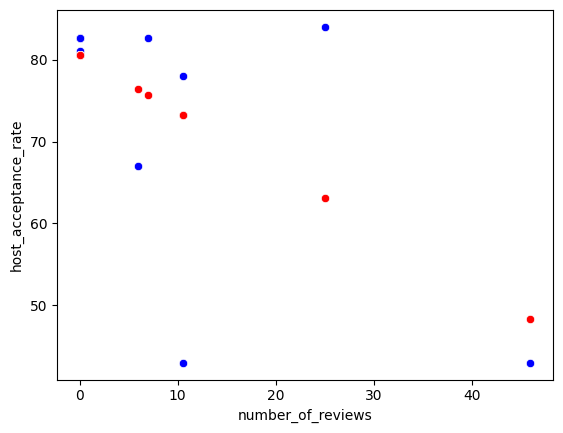

In [149]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='blue', data=data_shared)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color='red', data=data_shared)

In [150]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C5 = model_C5.score(X=vars_indep_C5, y=var_dep_C5)
coef_deter_C5

0.40953810898962295

In [151]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C5 = np.sqrt(coef_deter_C5)
coef_correl_C5

0.6399516458214816

#### Variables 6

In [152]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_C6 = data_shared[['review_scores_communication']]
var_dep_C6 = data_shared['reviews_per_month']

In [153]:
model_C6 = LinearRegression()

In [154]:
#Ajustamos el modelo con las variables antes declaradas
model_C6.fit(X=vars_indep_C6, y=var_dep_C6)

LinearRegression()

In [155]:
#Predecimos los valores a partir de la variable
y_pred_C6 = model_C6.predict(X=data_shared[['review_scores_communication']])

In [156]:
#Insertamos la columna de predicciones en el DataFrame
data_shared.insert(5,'predicciones_6',y_pred_C6)
data_shared.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
114            63.0        4.909717       73.588498      167.249997   
135            82.4        4.884609       73.588498      213.340500   
267            82.4        4.884609       73.588498      213.340500   

     predicciones_5  predicciones_6   host_id  host_response_rate  \
114       73.179497        0.724081  30661130               100.0   
135       80.614629        0.852169   8682387                98.7   
267       80.614629        0.852169   2288427                98.7   

     host_acceptance_rate  host_listings_count  ...  neighbourhood_cleansed  \
114                  43.0                  4.0  ...       Commune de Genève   
135                  82.6                  1.0  ...               Confignon   
267                  82.6                  4.0  ...          Grand-Saconnex   

                  property_type    room_type    bathrooms_text  \
114         Shared room in loft  Shared room  1.5 shared baths   
135  Shared room in rental unit  Shared room     1 shared bath   
267         Shared room in home  Shared room     1 shared bath   

                                             amenities  has_availability  \
114  ["Hangers", "Portable fans", "Hair dryer", "Cl...                 t   
135  ["Breakfast", "Essentials", "Shampoo", "Free p...                 t   
267  ["Dryer", "TV", "Free parking on premises", "W...                 t   

     calendar_last_scraped  first_review  last_review  instant_bookable  
114             2024-06-29    2015-05-09   2024-06-07                 f  
135             2024-06-29    2015-09-08   2024-01-29                 f  
267             2024-06-29    2016-06-30   2016-06-30                 f  

[3 rows x 66 columns]

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

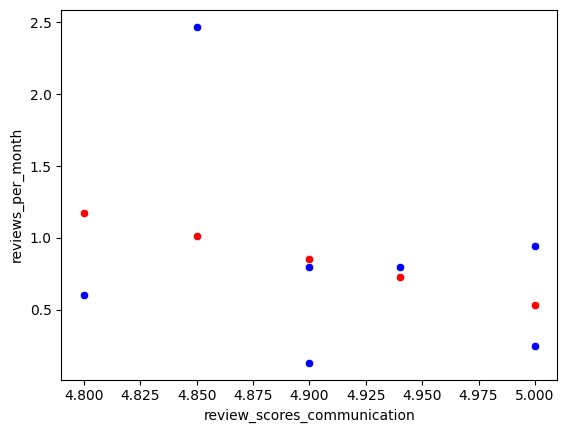

In [157]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color='blue', data=data_shared)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color='red', data=data_shared)

In [158]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_C6 = model_C6.score(X=vars_indep_C6, y=var_dep_C6)
coef_deter_C6

0.09566815411299268

In [159]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_C6 = np.sqrt(coef_deter_C6)
coef_correl_C6

0.3093026901159973

#### Tabla de Coeficientes de Determinación y Correlación

In [160]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_C1,coef_deter_C2,coef_deter_C3,coef_deter_C4,coef_deter_C5,coef_deter_C6],
             'Coef_Correl':[coef_correl_C1,coef_correl_C2,coef_correl_C3,coef_correl_C4,coef_correl_C5,coef_correl_C6]}

#Generar con llaves
df_coef_C = pd.DataFrame(coef_data,index=['Var1','Var2','Var3','Var4','Var5','Var6'])
df_coef_C

Coef_Deter  Coef_Correl
Var1    0.438271     0.662020
Var2    0.222205     0.471386
Var3    0.025232     0.158845
Var4    0.141686     0.376412
Var5    0.409538     0.639952
Var6    0.095668     0.309303

### Hotel room

In [161]:
#Se genera el SubFrame con los datos donde el tipo de habitacion sea el establecido
data_hotel = data[data['room_type'] == 'Hotel room']
data_hotel.shape

(2, 60)

#### Variables 1

In [162]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D1 = data_hotel[['host_response_rate']]
var_dep_D1 = data_hotel['host_acceptance_rate']

In [163]:
model_D1 = LinearRegression()

In [314]:
#Ajustamos el modelo con las variables antes declaradas
model_D1.fit(X=vars_indep_D1, y=var_dep_D1)

LinearRegression()

In [312]:
#Predecimos los valores a partir de la variable
y_pred_D1 = model_D1.predict(X=data_hotel[['host_response_rate']])

In [313]:
#Insertamos la columna de predicciones en el DataFrame
data_hotel.insert(0,'predicciones_1',y_pred_D1)
data_hotel.head(3)

ValueError: cannot insert predicciones_1, already exists

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

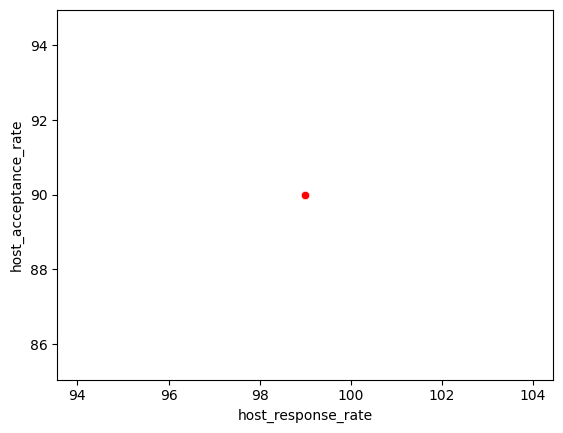

In [167]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=data_hotel)
sns.scatterplot(x='host_response_rate', y='predicciones_1', color='red', data=data_hotel)

In [315]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D1 = model_D1.score(X=vars_indep_D1, y=var_dep_D1)
coef_deter_D1

1.0

In [316]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D1 = np.sqrt(coef_deter_D1)
coef_correl_D1

1.0

#### Variables 2

In [170]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D2 = data_hotel[['review_scores_cleanliness']]
var_dep_D2 = data_hotel['review_scores_location']

In [171]:
model_D2 = LinearRegression()

In [172]:
#Ajustamos el modelo con las variables antes declaradas
model_D2.fit(X=vars_indep_D2, y=var_dep_D2)

LinearRegression()

In [173]:
#Predecimos los valores a partir de la variable
y_pred_D2 = model_D2.predict(X=data_hotel[['review_scores_cleanliness']])

In [174]:
#Insertamos la columna de predicciones en el DataFrame
data_hotel.insert(1,'predicciones_2',y_pred_D2)
data_hotel.head(3)

predicciones_1  predicciones_2  host_id  host_response_rate  \
324            90.0            4.71  3528377                99.0   
325            90.0            4.67  3528377                99.0   

     host_acceptance_rate  host_listings_count  host_total_listings_count  \
324                  90.0                  2.2                        3.0   
325                  90.0                  2.2                        3.0   

     latitude  longitude  accommodates  ...  neighbourhood_cleansed  \
324  46.20044     6.1616           1.0  ...       Commune de Genève   
325  46.20044     6.1616           2.0  ...       Commune de Genève   

              property_type   room_type  bathrooms_text  \
324  Room in boutique hotel  Hotel room  1 private bath   
325  Room in boutique hotel  Hotel room          1 bath   

                                             amenities  has_availability  \
324  ["TV with standard cable", "Hangers", "Smoke a...                 t   
325  ["TV with standard cable", "Dryer", "Hangers",...                 t   

     calendar_last_scraped  first_review  last_review  instant_bookable  
324             2024-06-29    2017-02-14   2022-05-01                 f  
325             2024-06-29    2016-12-23   2022-08-07                 f  

[2 rows x 62 columns]

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

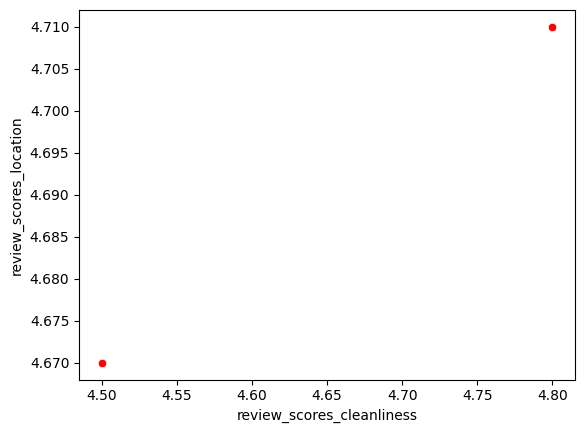

In [175]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color='blue', data=data_hotel)
sns.scatterplot(x='review_scores_cleanliness', y='predicciones_2', color='red', data=data_hotel)

In [176]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D2 = model_D2.score(X=vars_indep_D2, y=var_dep_D2)
coef_deter_D2

1.0

In [177]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D2 = np.sqrt(coef_deter_D2)
coef_correl_D2

1.0

#### Variables 3

In [178]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D3 = data_hotel[['price']]
var_dep_D3 = data_hotel['host_acceptance_rate']

In [179]:
model_D3 = LinearRegression()

In [180]:
#Ajustamos el modelo con las variables antes declaradas
model_D3.fit(X=vars_indep_D3, y=var_dep_D3)

LinearRegression()

In [181]:
#Predecimos los valores a partir de la variable
y_pred_D3 = model_D3.predict(X=data_hotel[['price']])

In [182]:
#Insertamos la columna de predicciones en el DataFrame
data_hotel.insert(2,'predicciones_3',y_pred_D3)
data_hotel.head(3)

predicciones_1  predicciones_2  predicciones_3  host_id  \
324            90.0            4.71            90.0  3528377   
325            90.0            4.67            90.0  3528377   

     host_response_rate  host_acceptance_rate  host_listings_count  \
324                99.0                  90.0                  2.2   
325                99.0                  90.0                  2.2   

     host_total_listings_count  latitude  longitude  ...  \
324                        3.0  46.20044     6.1616  ...   
325                        3.0  46.20044     6.1616  ...   

     neighbourhood_cleansed           property_type   room_type  \
324       Commune de Genève  Room in boutique hotel  Hotel room   
325       Commune de Genève  Room in boutique hotel  Hotel room   

     bathrooms_text                                          amenities  \
324  1 private bath  ["TV with standard cable", "Hangers", "Smoke a...   
325          1 bath  ["TV with standard cable", "Dryer", "Hangers",...   

     has_availability  calendar_last_scraped  first_review  last_review  \
324                 t             2024-06-29    2017-02-14   2022-05-01   
325                 t             2024-06-29    2016-12-23   2022-08-07   

     instant_bookable  
324                 f  
325                 f  

[2 rows x 63 columns]

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

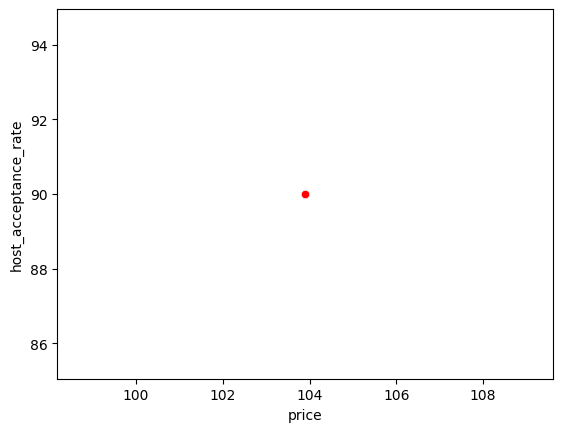

In [183]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='price', y='host_acceptance_rate', color='blue', data=data_hotel)
sns.scatterplot(x='price', y='predicciones_3', color='red', data=data_hotel)

In [184]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D3 = model_D3.score(X=vars_indep_D3, y=var_dep_D3)
coef_deter_D3

1.0

In [185]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D3 = np.sqrt(coef_deter_D3)
coef_correl_D3

1.0

#### Variables 4

In [186]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D4 = data_hotel[['number_of_reviews']]
var_dep_D4 = data_hotel['availability_365']

In [187]:
model_D4 = LinearRegression()

In [188]:
#Ajustamos el modelo con las variables antes declaradas
model_D4.fit(X=vars_indep_D4, y=var_dep_D4)

LinearRegression()

In [189]:
#Predecimos los valores a partir de la variable
y_pred_D4 = model_D4.predict(X=data_hotel[['number_of_reviews']])

In [190]:
#Insertamos la columna de predicciones en el DataFrame
data_hotel.insert(3,'predicciones_4',y_pred_D4)
data_hotel.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  host_id  \
324            90.0            4.71            90.0           361.0  3528377   
325            90.0            4.67            90.0           361.0  3528377   

     host_response_rate  host_acceptance_rate  host_listings_count  \
324                99.0                  90.0                  2.2   
325                99.0                  90.0                  2.2   

     host_total_listings_count  latitude  ...  neighbourhood_cleansed  \
324                        3.0  46.20044  ...       Commune de Genève   
325                        3.0  46.20044  ...       Commune de Genève   

              property_type   room_type  bathrooms_text  \
324  Room in boutique hotel  Hotel room  1 private bath   
325  Room in boutique hotel  Hotel room          1 bath   

                                             amenities  has_availability  \
324  ["TV with standard cable", "Hangers", "Smoke a...                 t   
325  ["TV with standard cable", "Dryer", "Hangers",...                 t   

     calendar_last_scraped  first_review  last_review  instant_bookable  
324             2024-06-29    2017-02-14   2022-05-01                 f  
325             2024-06-29    2016-12-23   2022-08-07                 f  

[2 rows x 64 columns]

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

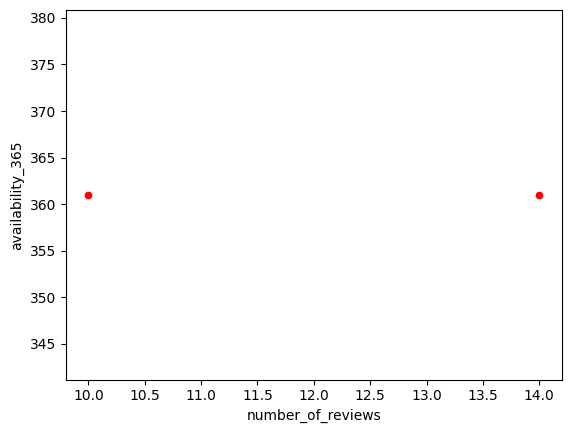

In [191]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='availability_365', color='blue', data=data_hotel)
sns.scatterplot(x='number_of_reviews', y='predicciones_4', color='red', data=data_hotel)

In [192]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D4 = model_D4.score(X=vars_indep_D4, y=var_dep_D4)
coef_deter_D4

1.0

In [193]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D4 = np.sqrt(coef_deter_D4)
coef_correl_D4

1.0

#### Variables 5

In [194]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D5 = data_hotel[['number_of_reviews']]
var_dep_D5 = data_hotel['host_acceptance_rate']

In [195]:
model_D5 = LinearRegression()

In [196]:
#Ajustamos el modelo con las variables antes declaradas
model_D5.fit(X=vars_indep_D5, y=var_dep_D5)

LinearRegression()

In [197]:
#Predecimos los valores a partir de la variable
y_pred_D5 = model_D5.predict(X=data_hotel[['number_of_reviews']])

In [198]:
#Insertamos la columna de predicciones en el DataFrame
data_hotel.insert(4,'predicciones_5',y_pred_D5)
data_hotel.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
324            90.0            4.71            90.0           361.0   
325            90.0            4.67            90.0           361.0   

     predicciones_5  host_id  host_response_rate  host_acceptance_rate  \
324            90.0  3528377                99.0                  90.0   
325            90.0  3528377                99.0                  90.0   

     host_listings_count  host_total_listings_count  ...  \
324                  2.2                        3.0  ...   
325                  2.2                        3.0  ...   

     neighbourhood_cleansed           property_type   room_type  \
324       Commune de Genève  Room in boutique hotel  Hotel room   
325       Commune de Genève  Room in boutique hotel  Hotel room   

     bathrooms_text                                          amenities  \
324  1 private bath  ["TV with standard cable", "Hangers", "Smoke a...   
325          1 bath  ["TV with standard cable", "Dryer", "Hangers",...   

     has_availability  calendar_last_scraped  first_review  last_review  \
324                 t             2024-06-29    2017-02-14   2022-05-01   
325                 t             2024-06-29    2016-12-23   2022-08-07   

     instant_bookable  
324                 f  
325                 f  

[2 rows x 65 columns]

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

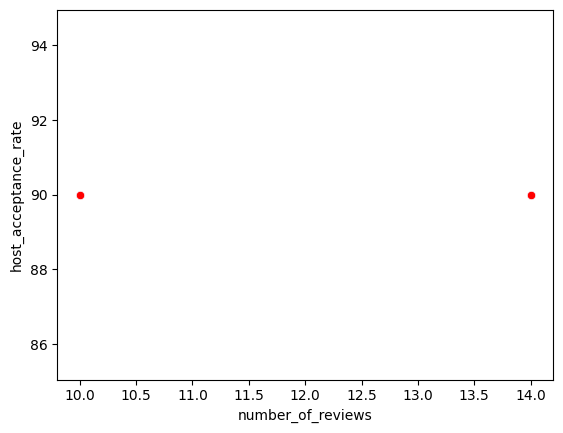

In [199]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color='blue', data=data_hotel)
sns.scatterplot(x='number_of_reviews', y='predicciones_5', color='red', data=data_hotel)

In [200]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D5 = model_D5.score(X=vars_indep_D5, y=var_dep_D5)
coef_deter_D5

1.0

In [201]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D5 = np.sqrt(coef_deter_D5)
coef_correl_D5

1.0

#### Variables 6

In [202]:
#Declaramos las variables dependientes e independientes para la regresion lineal
vars_indep_D6 = data_hotel[['review_scores_communication']]
var_dep_D6 = data_hotel['reviews_per_month']

In [203]:
model_D6 = LinearRegression()

In [204]:
#Ajustamos el modelo con las variables antes declaradas
model_D6.fit(X=vars_indep_D6, y=var_dep_D6)

LinearRegression()

In [205]:
#Predecimos los valores a partir de la variable
y_pred_D6 = model_D6.predict(X=data_hotel[['review_scores_communication']])

In [206]:
#Insertamos la columna de predicciones en el DataFrame
data_hotel.insert(5,'predicciones_6',y_pred_D6)
data_hotel.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
324            90.0            4.71            90.0           361.0   
325            90.0            4.67            90.0           361.0   

     predicciones_5  predicciones_6  host_id  host_response_rate  \
324            90.0           0.135  3528377                99.0   
325            90.0           0.135  3528377                99.0   

     host_acceptance_rate  host_listings_count  ...  neighbourhood_cleansed  \
324                  90.0                  2.2  ...       Commune de Genève   
325                  90.0                  2.2  ...       Commune de Genève   

              property_type   room_type  bathrooms_text  \
324  Room in boutique hotel  Hotel room  1 private bath   
325  Room in boutique hotel  Hotel room          1 bath   

                                             amenities  has_availability  \
324  ["TV with standard cable", "Hangers", "Smoke a...                 t   
325  ["TV with standard cable", "Dryer", "Hangers",...                 t   

     calendar_last_scraped  first_review  last_review  instant_bookable  
324             2024-06-29    2017-02-14   2022-05-01                 f  
325             2024-06-29    2016-12-23   2022-08-07                 f  

[2 rows x 66 columns]

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

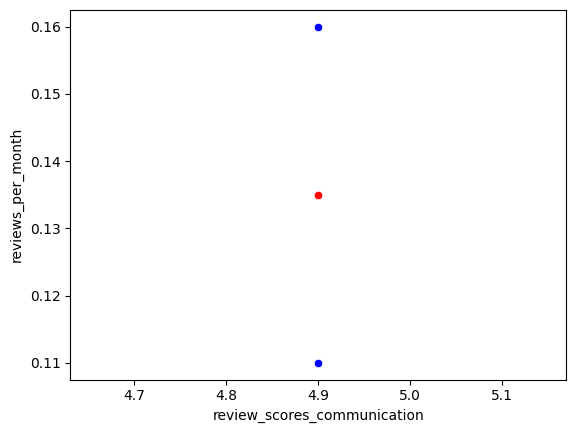

In [207]:
#Visualizamos la gráfica comparativa
sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color='blue', data=data_hotel)
sns.scatterplot(x='review_scores_communication', y='predicciones_6', color='red', data=data_hotel)

In [208]:
#Corrobaremos cual es el coeficiente de Determinacion de nuestro modelo (R_Cuadrada)
coef_deter_D6 = model_D6.score(X=vars_indep_D6, y=var_dep_D6)
coef_deter_D6

0.0

In [209]:
#Corroboramos cual es el coeficiente de correlacion de nuestro modelo (R)
coef_correl_D6 = np.sqrt(coef_deter_D6)
coef_correl_D6

0.0

#### Tabla de Coeficientes de Determinación y Correlación

In [210]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_D1,coef_deter_D2,coef_deter_D3,coef_deter_D4,coef_deter_D5,coef_deter_D6],
             'Coef_Correl':[coef_correl_D1,coef_correl_D2,coef_correl_D3,coef_correl_D4,coef_correl_D5,coef_correl_D6]}

#Generar con llaves
df_coef_D = pd.DataFrame(coef_data,index=['Var1','Var2','Var3','Var4','Var5','Var6'])
df_coef_D

Coef_Deter  Coef_Correl
Var1         1.0          1.0
Var2         1.0          1.0
Var3         1.0          1.0
Var4         1.0          1.0
Var5         1.0          1.0
Var6         0.0          0.0

## Regresión Lineal Múltiple

Para poder analizar la Regresión Lineal Múltiple, debemos crear el mejor modelo para cada una de las siguientes 10 variables: host_id, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month.

Para hacerlo, debemos encontrar aquellas variables cuantitativas que tienen la mejor correlación. Por lo que primero se deberá convertir el Frame a solo cuantitativas, para posteriormente realizar los procesos pertinentes.

### Convertir Frame a solo Cuantitativo

In [211]:
#Se crea una copia del frame original
data_mult = data.copy()

#### Datos Categoricos convertir a Cuantitativos

Entre las 10 variables a modelar se enucentran 2 que son categoricas, host_is_superhost y room_type. Por lo que primero se deben convertir sus datos a numericos

In [212]:
#Se detectan los valores unicos de la columna
np.unique(data_mult['host_is_superhost'])

array(['f', 't'], dtype=object)

In [213]:
#Se reemplazan los datos categoricos a numerico
data_mult['host_is_superhost'] = data_mult['host_is_superhost'].replace('f',0)
data_mult['host_is_superhost'] = data_mult['host_is_superhost'].replace('t',1)
data_mult['host_is_superhost'] = data_mult['host_is_superhost'].astype(int)

<ipython-input-213-537e1b3b3b9f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_mult['host_is_superhost'] = data_mult['host_is_superhost'].replace('t',1)


In [214]:
#Se detectan los valores unicos de la columna
np.unique(data_mult['room_type'])

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)

In [215]:
#Se reemplazan los datos categoricos a numerico
data_mult['room_type'] = data_mult['room_type'].replace('Entire home/apt',1)
data_mult['room_type'] = data_mult['room_type'].replace('Hotel room',2)
data_mult['room_type'] = data_mult['room_type'].replace('Private room',3)
data_mult['room_type'] = data_mult['room_type'].replace('Shared room',4)
data_mult['room_type'] = data_mult['room_type'].astype(int)

<ipython-input-215-682027192985>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_mult['room_type'] = data_mult['room_type'].replace('Shared room',4)


In [216]:
#Se detectan los valores unicos de la columna
np.unique(data_mult['instant_bookable'])

array(['f', 't'], dtype=object)

In [217]:
#Se reemplazan los datos categoricos a numerico
data_mult['instant_bookable'] = data_mult['instant_bookable'].replace('f',0)
data_mult['instant_bookable'] = data_mult['instant_bookable'].replace('t',1)
data_mult['instant_bookable'] = data_mult['instant_bookable'].astype(int)

<ipython-input-217-d33f4f03bbab>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_mult['instant_bookable'] = data_mult['instant_bookable'].replace('t',1)


#### Conservar Únicamente columnas cuantitativas

In [218]:
#Se eliminan columnas innecesarias
data_mult.drop(['last_scraped','source','name','description','host_name','host_since','host_location','host_response_time','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','property_type','bathrooms_text','amenities','has_availability','calendar_last_scraped','first_review','last_review'],axis=1,inplace=True)
data_mult.head(3)

host_id  host_response_rate  host_acceptance_rate  host_listings_count  \
0   185647               100.0                  80.0                  1.0   
1  1001280               100.0                 100.0                  6.0   
2  1442438               100.0                 100.0                  2.0   

   host_total_listings_count  latitude  longitude  accommodates  bathrooms  \
0                        1.0  46.20198    6.15672           1.0        1.0   
1                       12.0  46.19964    6.15580           2.0        1.0   
2                        2.0  46.20000    6.16833           3.0        1.0   

   bedrooms  ...  review_scores_location  review_scores_value  \
0       1.0  ...                    4.85                 4.54   
1       1.0  ...                    4.95                 4.80   
2       1.0  ...                    4.77                 4.70   

   calculated_host_listings_count  \
0                             1.0   
1                             2.0   
2                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.2   
1                                          2.0   
2                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           1.0   
1                                           0.0   
2                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                          0.0               0.50   
1                                          0.0               0.62   
2                                          0.0               0.80   

   host_is_superhost  room_type  instant_bookable  
0                  0          3                 0  
1                  1          1                 1  
2                  0          1                 0  

[3 rows x 41 columns]

In [219]:
#Verificar que todas las columnas sean cuantitativas
data_mult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_id                                       2685 non-null   int64  
 1   host_response_rate                            2685 non-null   float64
 2   host_acceptance_rate                          2685 non-null   float64
 3   host_listings_count                           2685 non-null   float64
 4   host_total_listings_count                     2685 non-null   float64
 5   latitude                                      2685 non-null   float64
 6   longitude                                     2685 non-null   float64
 7   accommodates                                  2685 non-null   float64
 8   bathrooms                                     2685 non-null   float64
 9   bedrooms                                      2685 non-null   f

### Crear Modelos

En primer lugar, para facilitar la busqueda de variables que sirvan correctamente como variables independientes para cada modelo se utiliza un 'heat map' el cuál nos muestre las variables con la mejor correlación.

In [220]:
#Encontramos todos los coeficientes de correlacion entre las variables
corr_factors = data_mult.corr()
corr_factors

host_id  host_response_rate  \
host_id                                       1.000000           -0.014853   
host_response_rate                           -0.014853            1.000000   
host_acceptance_rate                          0.028688            0.238429   
host_listings_count                           0.042958           -0.057497   
host_total_listings_count                    -0.016842           -0.098990   
latitude                                      0.059817            0.062515   
longitude                                    -0.053456           -0.065448   
accommodates                                 -0.097824           -0.003929   
bathrooms                                          NaN                 NaN   
bedrooms                                           NaN                 NaN   
beds                                         -0.068568            0.044307   
price                                        -0.051473           -0.051101   
minimum_nights                               -0.127551           -0.048509   
maximum_nights                               -0.137925           -0.061409   
minimum_minimum_nights                       -0.133252           -0.065364   
maximum_minimum_nights                       -0.130156           -0.041182   
minimum_maximum_nights                       -0.155585            0.047830   
maximum_maximum_nights                       -0.154771            0.059687   
minimum_nights_avg_ntm                       -0.125510           -0.050617   
maximum_nights_avg_ntm                       -0.158482            0.054498   
availability_30                               0.159330            0.065201   
availability_60                               0.158730            0.069172   
availability_365                              0.041657            0.076537   
number_of_reviews                            -0.139313            0.112427   
number_of_reviews_ltm                         0.017101            0.085381   
number_of_reviews_l30d                        0.014371            0.045589   
review_scores_rating                         -0.022638            0.077197   
review_scores_accuracy                        0.035268            0.035414   
review_scores_cleanliness                     0.031954            0.080633   
review_scores_checkin                         0.006326            0.058740   
review_scores_communication                  -0.034478            0.087850   
review_scores_location                        0.027073           -0.020093   
review_scores_value                           0.011470            0.093830   
calculated_host_listings_count                0.068933           -0.012479   
calculated_host_listings_count_entire_homes   0.032487           -0.015725   
calculated_host_listings_count_private_rooms -0.009564           -0.053623   
calculated_host_listings_count_shared_rooms        NaN                 NaN   
reviews_per_month                             0.129434            0.015540   
host_is_superhost                            -0.051438            0.120881   
room_type                                     0.070775            0.122144   
instant_bookable                              0.147233           -0.117664   

                                              host_acceptance_rate  \
host_id                                                   0.028688   
host_response_rate                                        0.238429   
host_acceptance_rate                                      1.000000   
host_listings_count                                       0.053048   
host_total_listings_count                                 0.019214   
latitude                                                  0.081655   
longitude                                                -0.026279   
accommodates                                              0.077970   
bathrooms                                                      NaN   
bedrooms                                                       NaN   


In [221]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
corr_factors1 = abs(corr_factors)
corr_factors1

host_id  host_response_rate  \
host_id                                       1.000000            0.014853   
host_response_rate                            0.014853            1.000000   
host_acceptance_rate                          0.028688            0.238429   
host_listings_count                           0.042958            0.057497   
host_total_listings_count                     0.016842            0.098990   
latitude                                      0.059817            0.062515   
longitude                                     0.053456            0.065448   
accommodates                                  0.097824            0.003929   
bathrooms                                          NaN                 NaN   
bedrooms                                           NaN                 NaN   
beds                                          0.068568            0.044307   
price                                         0.051473            0.051101   
minimum_nights                                0.127551            0.048509   
maximum_nights                                0.137925            0.061409   
minimum_minimum_nights                        0.133252            0.065364   
maximum_minimum_nights                        0.130156            0.041182   
minimum_maximum_nights                        0.155585            0.047830   
maximum_maximum_nights                        0.154771            0.059687   
minimum_nights_avg_ntm                        0.125510            0.050617   
maximum_nights_avg_ntm                        0.158482            0.054498   
availability_30                               0.159330            0.065201   
availability_60                               0.158730            0.069172   
availability_365                              0.041657            0.076537   
number_of_reviews                             0.139313            0.112427   
number_of_reviews_ltm                         0.017101            0.085381   
number_of_reviews_l30d                        0.014371            0.045589   
review_scores_rating                          0.022638            0.077197   
review_scores_accuracy                        0.035268            0.035414   
review_scores_cleanliness                     0.031954            0.080633   
review_scores_checkin                         0.006326            0.058740   
review_scores_communication                   0.034478            0.087850   
review_scores_location                        0.027073            0.020093   
review_scores_value                           0.011470            0.093830   
calculated_host_listings_count                0.068933            0.012479   
calculated_host_listings_count_entire_homes   0.032487            0.015725   
calculated_host_listings_count_private_rooms  0.009564            0.053623   
calculated_host_listings_count_shared_rooms        NaN                 NaN   
reviews_per_month                             0.129434            0.015540   
host_is_superhost                             0.051438            0.120881   
room_type                                     0.070775            0.122144   
instant_bookable                              0.147233            0.117664   

                                              host_acceptance_rate  \
host_id                                                   0.028688   
host_response_rate                                        0.238429   
host_acceptance_rate                                      1.000000   
host_listings_count                                       0.053048   
host_total_listings_count                                 0.019214   
latitude                                                  0.081655   
longitude                                                 0.026279   
accommodates                                              0.077970   
bathrooms                                                      NaN   
bedrooms                                                       NaN   


<Axes: >

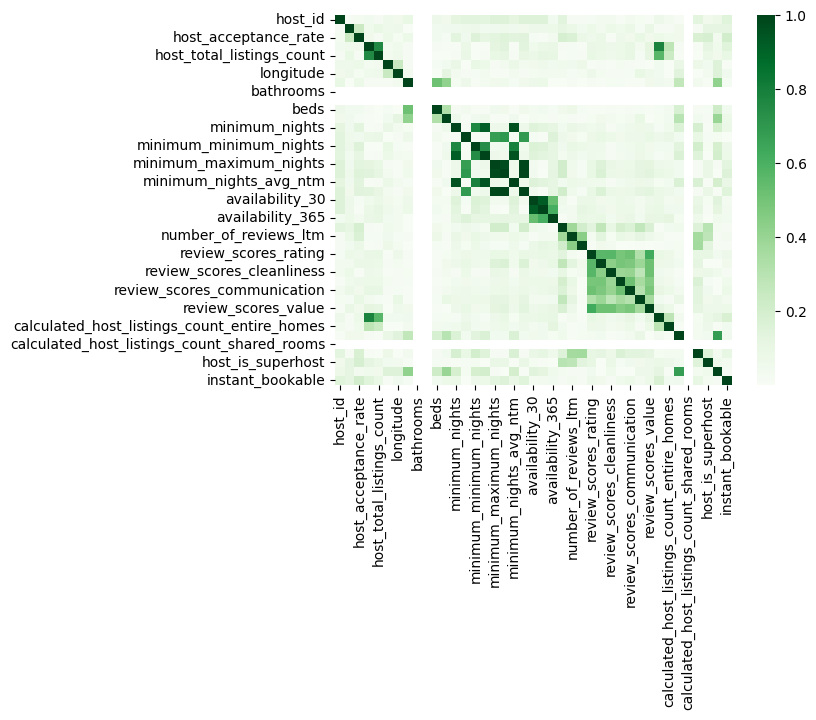

In [222]:
#Ajustemos el mapa del calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corr_factors1, cmap='Greens')
Heat_Map

#### Regresión y Graficación

A partir de la Heat Map anterior y de los datos de correlación, encontramos las mejores variables para cada una de las 10 columnas establecidas:

instant_bookable, host_acceptance_rate, host_is_superhost, host_total_listings_count, room_type, accommodates, bedrooms, Price, review_scores_value y reviews_per_month

[texto del vínculo](https:// [texto del vínculo](https://))##### Host is Superhost

In [223]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_1 = data_mult[['review_scores_rating', 'review_scores_communication', 'review_scores_value','calculated_host_listings_count','host_listings_count','number_of_reviews']]
var_dep_1 = data_mult['host_is_superhost']

In [224]:
model_1 = LinearRegression()

In [225]:
#Ajustamos el modelo con las variables antes declaradas
model_1.fit(X=vars_indep_1, y=var_dep_1)

LinearRegression()

In [226]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_1 = model_1.predict(X=data_mult[['review_scores_rating', 'review_scores_communication', 'review_scores_value','calculated_host_listings_count','host_listings_count','number_of_reviews']])

In [227]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(0,'predicciones_1',y_pred_1)
data_mult.head(3)

predicciones_1  host_id  host_response_rate  host_acceptance_rate  \
0        0.071349   185647               100.0                  80.0   
1        0.336251  1001280               100.0                 100.0   
2        0.101717  1442438               100.0                 100.0   

   host_listings_count  host_total_listings_count  latitude  longitude  \
0                  1.0                        1.0  46.20198    6.15672   
1                  6.0                       12.0  46.19964    6.15580   
2                  2.0                        2.0  46.20000    6.16833   

   accommodates  bathrooms  ...  review_scores_location  review_scores_value  \
0           1.0        1.0  ...                    4.85                 4.54   
1           2.0        1.0  ...                    4.95                 4.80   
2           3.0        1.0  ...                    4.77                 4.70   

   calculated_host_listings_count  \
0                             1.0   
1                             2.0   
2                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.2   
1                                          2.0   
2                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           1.0   
1                                           0.0   
2                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                          0.0               0.50   
1                                          0.0               0.62   
2                                          0.0               0.80   

   host_is_superhost  room_type  instant_bookable  
0                  0          3                 0  
1                  1          1                 1  
2                  0          1                 0  

[3 rows x 42 columns]

<Axes: xlabel='review_scores_rating', ylabel='host_is_superhost'>

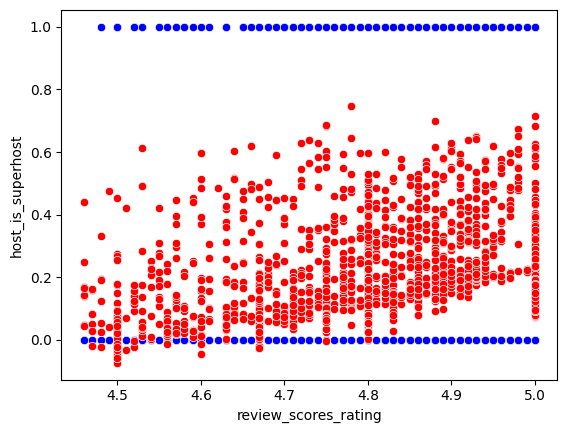

In [228]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color='blue', data=data_mult)
sns.scatterplot(x='review_scores_rating', y='predicciones_1', color='red', data=data_mult)

In [229]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_1 = model_1.score(X=vars_indep_1, y=var_dep_1)
coef_deter_1

0.13140219842642675

In [230]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_1 = np.sqrt(coef_deter_1)
coef_correl_1

0.3624944115795811

##### Room Type

In [231]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_2 = data_mult[['accommodates', 'calculated_host_listings_count_private_rooms', 'price']]
var_dep_2 = data_mult['room_type']

In [232]:
model_2 = LinearRegression()

In [233]:
#Ajustamos el modelo con las variables antes declaradas
model_2.fit(X=vars_indep_2, y=var_dep_2)

LinearRegression()

In [234]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_2 = model_2.predict(X=data_mult[['accommodates', 'calculated_host_listings_count_private_rooms', 'price']])

In [235]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(1,'predicciones_2',y_pred_2)
data_mult.head(3)

predicciones_1  predicciones_2  host_id  host_response_rate  \
0        0.071349        2.523486   185647               100.0   
1        0.336251        1.210484  1001280               100.0   
2        0.101717        1.318939  1442438               100.0   

   host_acceptance_rate  host_listings_count  host_total_listings_count  \
0                  80.0                  1.0                        1.0   
1                 100.0                  6.0                       12.0   
2                 100.0                  2.0                        2.0   

   latitude  longitude  accommodates  ...  review_scores_location  \
0  46.20198    6.15672           1.0  ...                    4.85   
1  46.19964    6.15580           2.0  ...                    4.95   
2  46.20000    6.16833           3.0  ...                    4.77   

   review_scores_value  calculated_host_listings_count  \
0                 4.54                             1.0   
1                 4.80                             2.0   
2                 4.70                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.2   
1                                          2.0   
2                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           1.0   
1                                           0.0   
2                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                          0.0               0.50   
1                                          0.0               0.62   
2                                          0.0               0.80   

   host_is_superhost  room_type  instant_bookable  
0                  0          3                 0  
1                  1          1                 1  
2                  0          1                 0  

[3 rows x 43 columns]

<Axes: xlabel='accommodates', ylabel='room_type'>

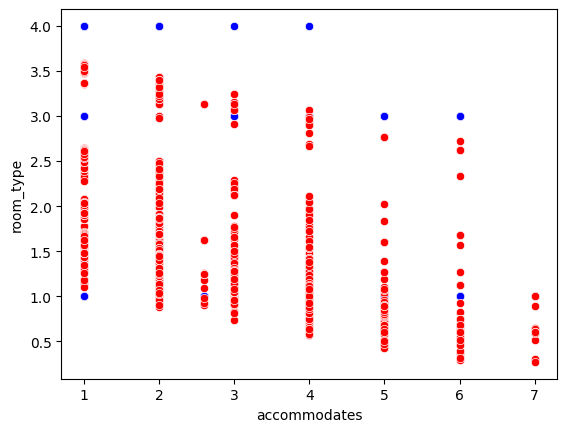

In [236]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='accommodates', y='room_type', color='blue', data=data_mult)
sns.scatterplot(x='accommodates', y='predicciones_2', color='red', data=data_mult)

In [237]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_2 = model_2.score(X=vars_indep_2, y=var_dep_2)
coef_deter_2

0.5375141741827976

In [238]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_2 = np.sqrt(coef_deter_2)
coef_correl_2

0.7331535815794652

##### Instant Bookable

In [239]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_3 = data_mult[['host_acceptance_rate', 'maximum_minimum_nights', 'calculated_host_listings_count','host_id']]
var_dep_3 = data_mult['instant_bookable']

In [240]:
model_3 = LinearRegression()

In [241]:
#Ajustamos el modelo con las variables antes declaradas
model_3.fit(X=vars_indep_3, y=var_dep_3)

LinearRegression()

In [242]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_3 = model_3.predict(X=data_mult[['host_acceptance_rate', 'maximum_minimum_nights', 'calculated_host_listings_count','host_id']])

In [243]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(2,'predicciones_3',y_pred_3)
data_mult.head(3)

predicciones_1  predicciones_2  predicciones_3  host_id  \
0        0.071349        2.523486        0.116279   185647   
1        0.336251        1.210484        0.239230  1001280   
2        0.101717        1.318939        0.177083  1442438   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0               100.0                  80.0                  1.0   
1               100.0                 100.0                  6.0   
2               100.0                 100.0                  2.0   

   host_total_listings_count  latitude  longitude  ...  \
0                        1.0  46.20198    6.15672  ...   
1                       12.0  46.19964    6.15580  ...   
2                        2.0  46.20000    6.16833  ...   

   review_scores_location  review_scores_value  \
0                    4.85                 4.54   
1                    4.95                 4.80   
2                    4.77                 4.70   

   calculated_host_listings_count  \
0                             1.0   
1                             2.0   
2                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.2   
1                                          2.0   
2                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           1.0   
1                                           0.0   
2                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                          0.0               0.50   
1                                          0.0               0.62   
2                                          0.0               0.80   

   host_is_superhost  room_type  instant_bookable  
0                  0          3                 0  
1                  1          1                 1  
2                  0          1                 0  

[3 rows x 44 columns]

<Axes: xlabel='host_acceptance_rate', ylabel='instant_bookable'>

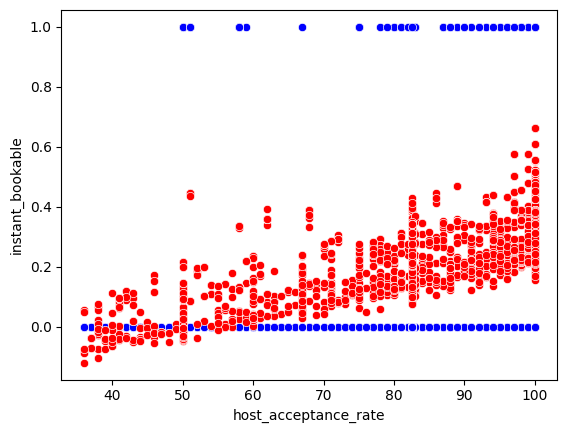

In [244]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='host_acceptance_rate', y='instant_bookable', color='blue', data=data_mult)
sns.scatterplot(x='host_acceptance_rate', y='predicciones_3', color='red', data=data_mult)

In [245]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_3 = model_3.score(X=vars_indep_3, y=var_dep_3)
coef_deter_3

0.08661906803448016

In [246]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_3 = np.sqrt(coef_deter_3)
coef_correl_3

0.2943111755174787

##### Accomodates

In [247]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_4 = data_mult[['instant_bookable', 'bedrooms', 'beds','price']]
var_dep_4 = data_mult['accommodates']

In [248]:
model_4 = LinearRegression()

In [249]:
#Ajustamos el modelo con las variables antes declaradas
model_4.fit(X=vars_indep_4, y=var_dep_4)

LinearRegression()

In [250]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_4 = model_4.predict(X=data_mult[['instant_bookable', 'bedrooms', 'beds','price']])

In [251]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(3,'predicciones_4',y_pred_4)
data_mult.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  host_id  \
0        0.071349        2.523486        0.116279        1.851340   185647   
1        0.336251        1.210484        0.239230        2.883626  1001280   
2        0.101717        1.318939        0.177083        2.178405  1442438   

   host_response_rate  host_acceptance_rate  host_listings_count  \
0               100.0                  80.0                  1.0   
1               100.0                 100.0                  6.0   
2               100.0                 100.0                  2.0   

   host_total_listings_count  latitude  ...  review_scores_location  \
0                        1.0  46.20198  ...                    4.85   
1                       12.0  46.19964  ...                    4.95   
2                        2.0  46.20000  ...                    4.77   

   review_scores_value  calculated_host_listings_count  \
0                 4.54                             1.0   
1                 4.80                             2.0   
2                 4.70                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.2   
1                                          2.0   
2                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           1.0   
1                                           0.0   
2                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                          0.0               0.50   
1                                          0.0               0.62   
2                                          0.0               0.80   

   host_is_superhost  room_type  instant_bookable  
0                  0          3                 0  
1                  1          1                 1  
2                  0          1                 0  

[3 rows x 45 columns]

<Axes: xlabel='bedrooms', ylabel='accommodates'>

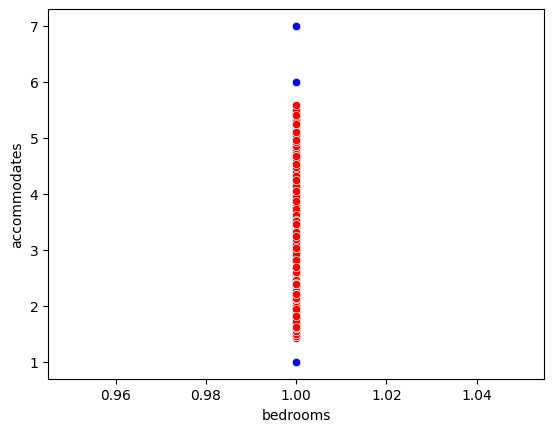

In [252]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='bedrooms', y='accommodates', color='blue', data=data_mult)
sns.scatterplot(x='bedrooms', y='predicciones_4', color='red', data=data_mult)

In [253]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_4 = model_4.score(X=vars_indep_4, y=var_dep_4)
coef_deter_4

0.3360697917930625

In [254]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_4 = np.sqrt(coef_deter_4)
coef_correl_4

0.5797152678626487

##### Bedrooms

In [255]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_5 = data_mult[['accommodates', 'beds', 'calculated_host_listings_count','price']]
var_dep_5 = data_mult['bedrooms']

In [256]:
model_5 = LinearRegression()

In [257]:
#Ajustamos el modelo con las variables antes declaradas
model_5.fit(X=vars_indep_5, y=var_dep_5)

LinearRegression()

In [258]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_5 = model_5.predict(X=data_mult[['accommodates', 'beds', 'calculated_host_listings_count','price']])

In [259]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(4,'predicciones_5',y_pred_5)
data_mult.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0        0.071349        2.523486        0.116279        1.851340   
1        0.336251        1.210484        0.239230        2.883626   
2        0.101717        1.318939        0.177083        2.178405   

   predicciones_5  host_id  host_response_rate  host_acceptance_rate  \
0             1.0   185647               100.0                  80.0   
1             1.0  1001280               100.0                 100.0   
2             1.0  1442438               100.0                 100.0   

   host_listings_count  host_total_listings_count  ...  \
0                  1.0                        1.0  ...   
1                  6.0                       12.0  ...   
2                  2.0                        2.0  ...   

   review_scores_location  review_scores_value  \
0                    4.85                 4.54   
1                    4.95                 4.80   
2                    4.77                 4.70   

   calculated_host_listings_count  \
0                             1.0   
1                             2.0   
2                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.2   
1                                          2.0   
2                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           1.0   
1                                           0.0   
2                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                          0.0               0.50   
1                                          0.0               0.62   
2                                          0.0               0.80   

   host_is_superhost  room_type  instant_bookable  
0                  0          3                 0  
1                  1          1                 1  
2                  0          1                 0  

[3 rows x 46 columns]

<Axes: xlabel='beds', ylabel='bedrooms'>

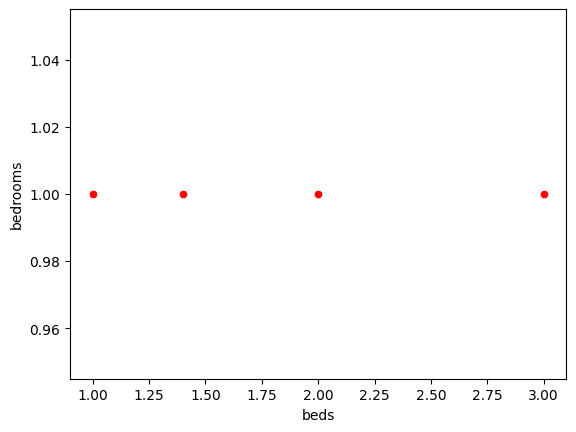

In [260]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='beds', y='bedrooms', color='blue', data=data_mult)
sns.scatterplot(x='beds', y='predicciones_5', color='red', data=data_mult)

In [261]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_5 = model_5.score(X=vars_indep_5, y=var_dep_5)
coef_deter_5

1.0

In [262]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_5 = np.sqrt(coef_deter_5)
coef_correl_5

1.0

##### Review Scores Value

In [263]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_6 = data_mult[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication']]
var_dep_6 = data_mult['review_scores_value']

In [264]:
model_6 = LinearRegression()

In [265]:
#Ajustamos el modelo con las variables antes declaradas
model_6.fit(X=vars_indep_6, y=var_dep_6)

LinearRegression()

In [266]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_6 = model_6.predict(X=data_mult[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication']])

In [267]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(5,'predicciones_6',y_pred_6)
data_mult.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0        0.071349        2.523486        0.116279        1.851340   
1        0.336251        1.210484        0.239230        2.883626   
2        0.101717        1.318939        0.177083        2.178405   

   predicciones_5  predicciones_6  host_id  host_response_rate  \
0             1.0        4.606138   185647               100.0   
1             1.0        4.829765  1001280               100.0   
2             1.0        4.564317  1442438               100.0   

   host_acceptance_rate  host_listings_count  ...  review_scores_location  \
0                  80.0                  1.0  ...                    4.85   
1                 100.0                  6.0  ...                    4.95   
2                 100.0                  2.0  ...                    4.77   

   review_scores_value  calculated_host_listings_count  \
0                 4.54                             1.0   
1                 4.80                             2.0   
2                 4.70                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.2   
1                                          2.0   
2                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           1.0   
1                                           0.0   
2                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                          0.0               0.50   
1                                          0.0               0.62   
2                                          0.0               0.80   

   host_is_superhost  room_type  instant_bookable  
0                  0          3                 0  
1                  1          1                 1  
2                  0          1                 0  

[3 rows x 47 columns]

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

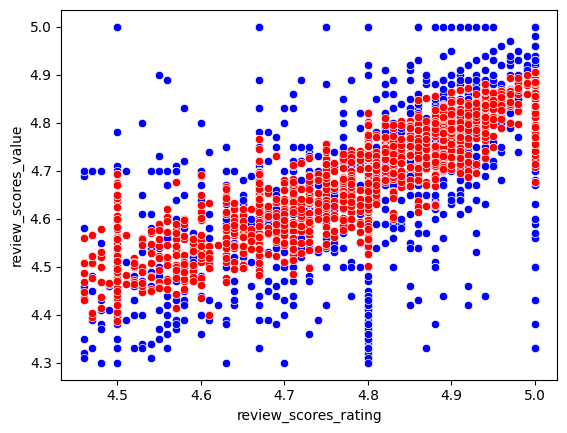

In [268]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color='blue', data=data_mult)
sns.scatterplot(x='review_scores_rating', y='predicciones_6', color='red', data=data_mult)

In [269]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_6 = model_6.score(X=vars_indep_6, y=var_dep_6)
coef_deter_6

0.47658427945124227

In [270]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_6 = np.sqrt(coef_deter_6)
coef_correl_6

0.690350837944912

##### Reviews Per Month

In [271]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_7 = data_mult[['number_of_reviews_l30d', 'minimum_nights', 'minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm','number_of_reviews_ltm']]
var_dep_7 = data_mult['reviews_per_month']

In [272]:
model_7 = LinearRegression()

In [273]:
#Ajustamos el modelo con las variables antes declaradas
model_7.fit(X=vars_indep_7, y=var_dep_7)

LinearRegression()

In [274]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_7 = model_7.predict(X=data_mult[['number_of_reviews_l30d', 'minimum_nights', 'minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm','number_of_reviews_ltm']])

In [275]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(6,'predicciones_7',y_pred_7)
data_mult.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0        0.071349        2.523486        0.116279        1.851340   
1        0.336251        1.210484        0.239230        2.883626   
2        0.101717        1.318939        0.177083        2.178405   

   predicciones_5  predicciones_6  predicciones_7  host_id  \
0             1.0        4.606138        1.371311   185647   
1             1.0        4.829765        1.000259  1001280   
2             1.0        4.564317        0.585095  1442438   

   host_response_rate  host_acceptance_rate  ...  review_scores_location  \
0               100.0                  80.0  ...                    4.85   
1               100.0                 100.0  ...                    4.95   
2               100.0                 100.0  ...                    4.77   

   review_scores_value  calculated_host_listings_count  \
0                 4.54                             1.0   
1                 4.80                             2.0   
2                 4.70                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.2   
1                                          2.0   
2                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           1.0   
1                                           0.0   
2                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                          0.0               0.50   
1                                          0.0               0.62   
2                                          0.0               0.80   

   host_is_superhost  room_type  instant_bookable  
0                  0          3                 0  
1                  1          1                 1  
2                  0          1                 0  

[3 rows x 48 columns]

<Axes: xlabel='number_of_reviews_l30d', ylabel='reviews_per_month'>

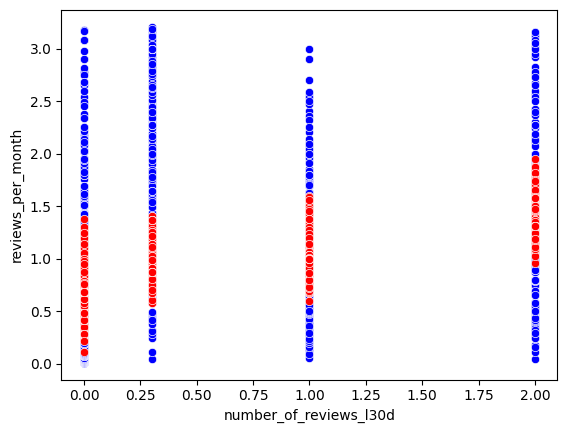

In [276]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color='blue', data=data_mult)
sns.scatterplot(x='number_of_reviews_l30d', y='predicciones_7', color='red', data=data_mult)

In [277]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_7 = model_7.score(X=vars_indep_7, y=var_dep_7)
coef_deter_7

0.21315931050789827

In [278]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_7 = np.sqrt(coef_deter_7)
coef_correl_7

0.46169179168347607

##### Host Acceptance Rate

In [279]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_8 = data_mult[['number_of_reviews_l30d', 'host_response_rate', 'maximum_minimum_nights']]
var_dep_8 = data_mult['host_acceptance_rate']

In [280]:
model_8 = LinearRegression()

In [281]:
#Ajustamos el modelo con las variables antes declaradas
model_8.fit(X=vars_indep_8, y=var_dep_8)

LinearRegression()

In [282]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_8 = model_8.predict(X=data_mult[['number_of_reviews_l30d', 'host_response_rate', 'maximum_minimum_nights']])

In [283]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(7,'predicciones_8',y_pred_8)
data_mult.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0        0.071349        2.523486        0.116279        1.851340   
1        0.336251        1.210484        0.239230        2.883626   
2        0.101717        1.318939        0.177083        2.178405   

   predicciones_5  predicciones_6  predicciones_7  predicciones_8  host_id  \
0             1.0        4.606138        1.371311       88.141214   185647   
1             1.0        4.829765        1.000259       84.357331  1001280   
2             1.0        4.564317        0.585095       80.573448  1442438   

   host_response_rate  ...  review_scores_location  review_scores_value  \
0               100.0  ...                    4.85                 4.54   
1               100.0  ...                    4.95                 4.80   
2               100.0  ...                    4.77                 4.70   

   calculated_host_listings_count  \
0                             1.0   
1                             2.0   
2                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.2   
1                                          2.0   
2                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           1.0   
1                                           0.0   
2                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                          0.0               0.50   
1                                          0.0               0.62   
2                                          0.0               0.80   

   host_is_superhost  room_type  instant_bookable  
0                  0          3                 0  
1                  1          1                 1  
2                  0          1                 0  

[3 rows x 49 columns]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

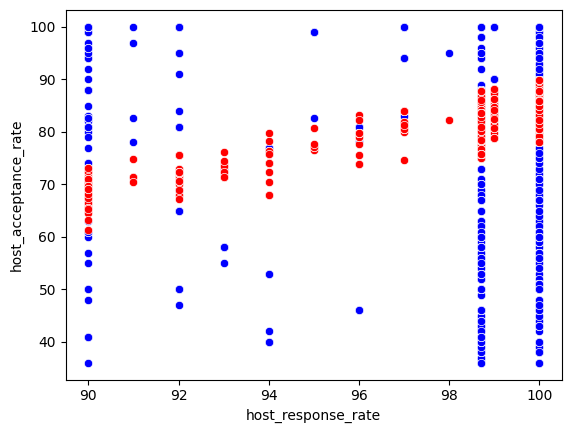

In [284]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color='blue', data=data_mult)
sns.scatterplot(x='host_response_rate', y='predicciones_8', color='red', data=data_mult)

In [285]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_8 = model_8.score(X=vars_indep_8, y=var_dep_8)
coef_deter_8

0.07302103038053032

In [286]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_8 = np.sqrt(coef_deter_8)
coef_correl_8

0.2702240373847788

##### Host Total Listings Count

In [287]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_9 = data_mult[['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'host_listings_count']]
var_dep_9 = data_mult['host_total_listings_count']

In [288]:
model_9 = LinearRegression()

In [289]:
#Ajustamos el modelo con las variables antes declaradas
model_9.fit(X=vars_indep_9, y=var_dep_9)

LinearRegression()

In [290]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_9 = model_9.predict(X=data_mult[['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'host_listings_count']])

In [291]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(8,'predicciones_9',y_pred_9)
data_mult.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0        0.071349        2.523486        0.116279        1.851340   
1        0.336251        1.210484        0.239230        2.883626   
2        0.101717        1.318939        0.177083        2.178405   

   predicciones_5  predicciones_6  predicciones_7  predicciones_8  \
0             1.0        4.606138        1.371311       88.141214   
1             1.0        4.829765        1.000259       84.357331   
2             1.0        4.564317        0.585095       80.573448   

   predicciones_9  host_id  ...  review_scores_location  review_scores_value  \
0        1.742127   185647  ...                    4.85                 4.54   
1        7.191041  1001280  ...                    4.95                 4.80   
2        2.798050  1442438  ...                    4.77                 4.70   

   calculated_host_listings_count  \
0                             1.0   
1                             2.0   
2                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.2   
1                                          2.0   
2                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           1.0   
1                                           0.0   
2                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                          0.0               0.50   
1                                          0.0               0.62   
2                                          0.0               0.80   

   host_is_superhost  room_type  instant_bookable  
0                  0          3                 0  
1                  1          1                 1  
2                  0          1                 0  

[3 rows x 50 columns]

<Axes: xlabel='calculated_host_listings_count', ylabel='host_total_listings_count'>

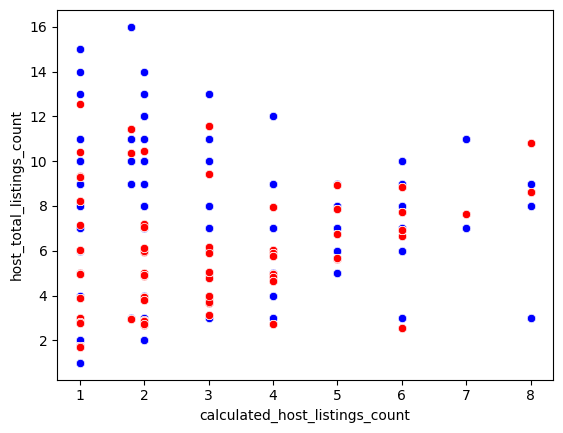

In [292]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='calculated_host_listings_count', y='host_total_listings_count', color='blue', data=data_mult)
sns.scatterplot(x='calculated_host_listings_count', y='predicciones_9', color='red', data=data_mult)

In [293]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_9 = model_9.score(X=vars_indep_9, y=var_dep_9)
coef_deter_9

0.5739976222918998

In [294]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_9 = np.sqrt(coef_deter_9)
coef_correl_9

0.7576263078140171

##### Price

In [295]:
#Declaramos las variables dependientes e independientes para la regresión lineal
vars_indep_10 = data_mult[['room_type', 'accommodates', 'beds']]
var_dep_10 = data_mult['price']

In [296]:
model_10 = LinearRegression()

In [297]:
#Ajustamos el modelo con las variables antes declaradas
model_10.fit(X=vars_indep_10, y=var_dep_10)

LinearRegression()

In [298]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred_10 = model_10.predict(X=data_mult[['room_type', 'accommodates', 'beds']])

In [299]:
#Insertamos la columna de predicciones en el DataFrame
data_mult.insert(9,'predicciones_10',y_pred_10)
data_mult.head(3)

predicciones_1  predicciones_2  predicciones_3  predicciones_4  \
0        0.071349        2.523486        0.116279        1.851340   
1        0.336251        1.210484        0.239230        2.883626   
2        0.101717        1.318939        0.177083        2.178405   

   predicciones_5  predicciones_6  predicciones_7  predicciones_8  \
0             1.0        4.606138        1.371311       88.141214   
1             1.0        4.829765        1.000259       84.357331   
2             1.0        4.564317        0.585095       80.573448   

   predicciones_9  predicciones_10  ...  review_scores_location  \
0        1.742127        75.082095  ...                    4.85   
1        7.191041       106.163979  ...                    4.95   
2        2.798050       112.539832  ...                    4.77   

   review_scores_value  calculated_host_listings_count  \
0                 4.54                             1.0   
1                 4.80                             2.0   
2                 4.70                             1.0   

   calculated_host_listings_count_entire_homes  \
0                                          1.2   
1                                          2.0   
2                                          1.0   

   calculated_host_listings_count_private_rooms  \
0                                           1.0   
1                                           0.0   
2                                           0.0   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                          0.0               0.50   
1                                          0.0               0.62   
2                                          0.0               0.80   

   host_is_superhost  room_type  instant_bookable  
0                  0          3                 0  
1                  1          1                 1  
2                  0          1                 0  

[3 rows x 51 columns]

<Axes: xlabel='accommodates', ylabel='price'>

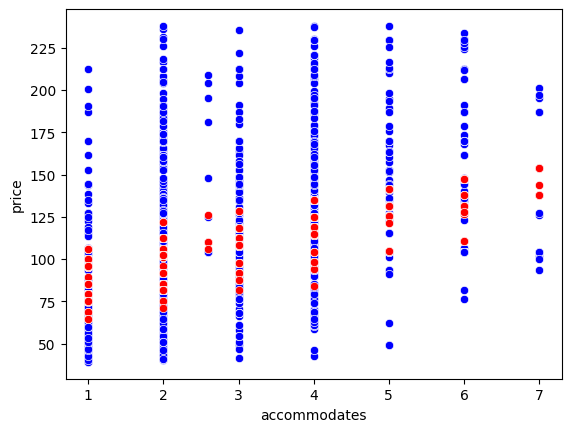

In [300]:
#Visualizamos la grafica comparativa entre el total real y el total parecido
sns.scatterplot(x='accommodates', y='price', color='blue', data=data_mult)
sns.scatterplot(x='accommodates', y='predicciones_10', color='red', data=data_mult)

In [301]:
#Corrobaremos cual es el coeficiente de Determinación de nuestro modelo
coef_deter_10 = model_10.score(X=vars_indep_10, y=var_dep_10)
coef_deter_10

0.2503795907393579

In [302]:
#Corrobaremos cual es el coeficiente de correlación de nuestro modelo
coef_correl_10 = np.sqrt(coef_deter_10)
coef_correl_10

0.5003794467595146

##### Tabla de Correlaciones

In [303]:
#Preparar datos del Frame
coef_data = {'Coef_Deter':[coef_deter_1,coef_deter_2,coef_deter_3,coef_deter_4,coef_deter_5,coef_deter_6,coef_deter_7,coef_deter_8,coef_deter_9,coef_deter_10],
             'Coef_Correl':[coef_correl_1,coef_correl_2,coef_correl_3,coef_correl_4,coef_correl_5,coef_correl_6,coef_correl_7,coef_correl_8,coef_correl_9,coef_correl_10]}

#Generar con llaves
df_coef_mult = pd.DataFrame(coef_data,index=['RegresionMult_1','RegresionMult_2','RegresionMult_3','RegresionMult_4','RegresionMult_5','RegresionMult_6','RegresionMult_7','RegresionMult_8','RegresionMult_9','RegresionMult_10'])
df_coef_mult

Coef_Deter  Coef_Correl
RegresionMult_1     0.131402     0.362494
RegresionMult_2     0.537514     0.733154
RegresionMult_3     0.086619     0.294311
RegresionMult_4     0.336070     0.579715
RegresionMult_5     1.000000     1.000000
RegresionMult_6     0.476584     0.690351
RegresionMult_7     0.213159     0.461692
RegresionMult_8     0.073021     0.270224
RegresionMult_9     0.573998     0.757626
RegresionMult_10    0.250380     0.500379